<a href="https://colab.research.google.com/github/micah-shull/loan_defaults/blob/main/loan_defaults_008_eda_categorical_data_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Description

This dataset contains information on clients' credit card behavior, provided by a financial institution in Taiwan. The target variable is `default_payment_next_month`, which indicates whether the client defaulted on their credit card payment the next month.

url = https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

#### Variables:

- **ID**: ID of each client.
- **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit).
- **SEX**: Gender (1 = male, 2 = female).
- **EDUCATION**: Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others, 5 = unknown, 6 = unknown).
- **MARRIAGE**: Marital status (1 = married, 2 = single, 3 = others).
- **AGE**: Age in years.

#### Payment History (PAY_X):
- **PAY_0**: Repayment status in September 2005 (-1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above).
- **PAY_2**: Repayment status in August 2005.
- **PAY_3**: Repayment status in July 2005.
- **PAY_4**: Repayment status in June 2005.
- **PAY_5**: Repayment status in May 2005.
- **PAY_6**: Repayment status in April 2005.

#### Bill Statement Amount (BILL_AMT_X):
- **BILL_AMT1**: Amount of bill statement in September 2005 (NT dollars).
- **BILL_AMT2**: Amount of bill statement in August 2005 (NT dollars).
- **BILL_AMT3**: Amount of bill statement in July 2005 (NT dollars).
- **BILL_AMT4**: Amount of bill statement in June 2005 (NT dollars).
- **BILL_AMT5**: Amount of bill statement in May 2005 (NT dollars).
- **BILL_AMT6**: Amount of bill statement in April 2005 (NT dollars).

#### Previous Payment Amount (PAY_AMT_X):
- **PAY_AMT1**: Amount of previous payment in September 2005 (NT dollars).
- **PAY_AMT2**: Amount of previous payment in August 2005 (NT dollars).
- **PAY_AMT3**: Amount of previous payment in July 2005 (NT dollars).
- **PAY_AMT4**: Amount of previous payment in June 2005 (NT dollars).
- **PAY_AMT5**: Amount of previous payment in May 2005 (NT dollars).
- **PAY_AMT6**: Amount of previous payment in April 2005 (NT dollars).

- **default_payment_next_month**: Default payment indicator (1 = yes, 0 = no).

#### Explanation for Feature Reordering:
The bill statement and payment amounts are listed in reverse chronological order in the dataset. To ensure that the feature names match the actual sequence of events, we reverse the column names for `BILL_AMT` and `PAY_AMT` features so that they correctly represent the time sequence from April 2005 to September 2005.



## Load & Preprocess Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from loan_data_utils import (load_data_from_url, clean_column_names, remove_id_column, rename_pay_columns, rename_bill_and_payment_columns,
                             label_pay_columns, convert_pay_columns_to_ordinal, reorder_columns, convert_education_to_ordinal, process_sex_column,
                             process_marriage_column, convert_ordinal_to_category, check_column_integrity, validate_data_types,
                             check_categorical_order, primary_columns, bill_columns, pay_columns, ordinal_columns)
from eda_utils import data_overview, plot_univariate_distributions, plot_class_distribution
import logging

# Define your URL, categorical columns, and target
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'marriage']
target = 'default_payment_next_month'

def load_and_preprocess_data(url, categorical_columns, target):
    df = load_data_from_url(url)
    if df is not None:
        try:
            # Include the target column from the start
            df = clean_column_names(df)
            df = remove_id_column(df)
            df = rename_pay_columns(df)
            df = rename_bill_and_payment_columns(df)
            df = label_pay_columns(df, [col for col in df.columns if 'pay_delay' in col])
            df = convert_pay_columns_to_ordinal(df, [col for col in df.columns if 'pay_delay' in col])
            df = reorder_columns(df)
            df = convert_education_to_ordinal(df)
            df = process_sex_column(df)
            df = process_marriage_column(df)
            df = convert_ordinal_to_category(df, ordinal_columns)

            # Run validation checks
            check_column_integrity(df, primary_columns + bill_columns + pay_columns + ordinal_columns)
            validate_data_types(df, ordinal_columns)

            # Drop duplicates consistently across both features and target
            df = df.drop_duplicates()

            logging.info("Data loaded and preprocessed successfully.")
            return df
        except Exception as e:
            logging.error(f"Error in data preprocessing: {e}")
            return None
    return None

# Now, load the data
df = load_and_preprocess_data(url, categorical_columns, target)

if df is not None:
    # Ensure the target column is treated as a categorical variable
    df[target] = df[target].astype('category')

    # Print data overview
    data_overview(df)

    # Drop duplicate rows (optional if you didn’t remove them earlier)
    df = df.drop_duplicates()

    # Confirm the duplicates are removed
    print(f"Number of Duplicate Rows After Dropping: {df.duplicated().sum()}")

    # List of columns to check
    pay_cols = [col for col in df.columns if col.startswith('pay_delay')]

    # Check the order of categorical columns
    check_categorical_order(df, categorical_columns + pay_cols)
else:
    print("Error loading and preprocessing data.")


Missing Values: 0
Missing Percentage: 0.0
Number of Duplicate Rows: 0

<class 'pandas.core.frame.DataFrame'>
Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   limit_bal                   29965 non-null  int64   
 1   sex                         29965 non-null  category
 2   education                   29965 non-null  category
 3   marriage                    29965 non-null  category
 4   age                         29965 non-null  int64   
 5   bill_amt_4_april            29965 non-null  int64   
 6   bill_amt_5_may              29965 non-null  int64   
 7   bill_amt_6_june             29965 non-null  int64   
 8   bill_amt_7_july             29965 non-null  int64   
 9   bill_amt_8_august           29965 non-null  int64   
 10  bill_amt_9_september        29965 non-null  int64   
 11  pay_amt_4_april             29965 non-null  int64   
 12  pay_amt_

## Categorical Data Exploration

### Step 1: Explore Categorical Data Distributions
1. **Distribution Visualization**:
    - Plot bar charts for each categorical feature to visualize the frequency of each category. This will help you spot imbalanced categories or potential outliers.
    - Include percentage annotations to better understand the distribution.

2. **Frequency Analysis**:
    - Calculate the frequency and percentage of each category within the features to quantify how prevalent each category is.
    - Identify categories that have very few samples, which might impact the model's ability to generalize.

### Step 2: Identify Outliers or Small Categories
1. **Threshold-Based Analysis**:
    - Set a threshold for the minimum number or percentage of samples a category should have. Categories below this threshold could be flagged as outliers.

2. **Cross-Feature Analysis**:
    - Analyze the relationship between small categories and the target variable. Use statistical tests (e.g., chi-square tests) to determine if these small categories have a significant impact.

### Step 3: Statistical Significance Testing
1. **Chi-Square Test**:
    - For each categorical feature, perform a chi-square test to evaluate the relationship between the categories and the target variable.
    - Determine which categories are statistically significant and should be kept, combined, or removed.

2. **Fisher’s Exact Test**:
    - If some categories have very low frequencies, use Fisher’s Exact Test as an alternative to the chi-square test.

### Step 4: Handle Small or Insignificant Categories
1. **Combining Categories**:
    - Combine small or similar categories into a larger “Other” category if they are not statistically significant.
    - Group categories based on domain knowledge or similarity to enhance model interpretability.

2. **Removing Categories**:
    - If certain categories show little to no relevance after the statistical tests, consider removing them.

### Step 5: Encoding Categorical Data
1. **Ordinal Encoding**:
    - If the categories have an inherent order (e.g., education levels), use ordinal encoding.

2. **One-Hot Encoding**:
    - For non-ordinal features, use one-hot encoding while considering how many new features it introduces. This method works best if the categories are balanced.

### Step 6: Preprocessing Pipeline and Final Validation
1. **Create a Categorical Data Pipeline**:
    - Build a pipeline that handles preprocessing steps like encoding, category grouping, and category removal.
  
2. **Feature Importance Analysis**:
    - After preparing the data, evaluate the importance of categorical features using tree-based models (e.g., Random Forest) or model-based selection techniques.

3. **Model Performance Comparison**:
    - Compare the model's performance before and after handling categorical features to confirm that the preprocessing steps enhanced performance.


### Distributions Visualization

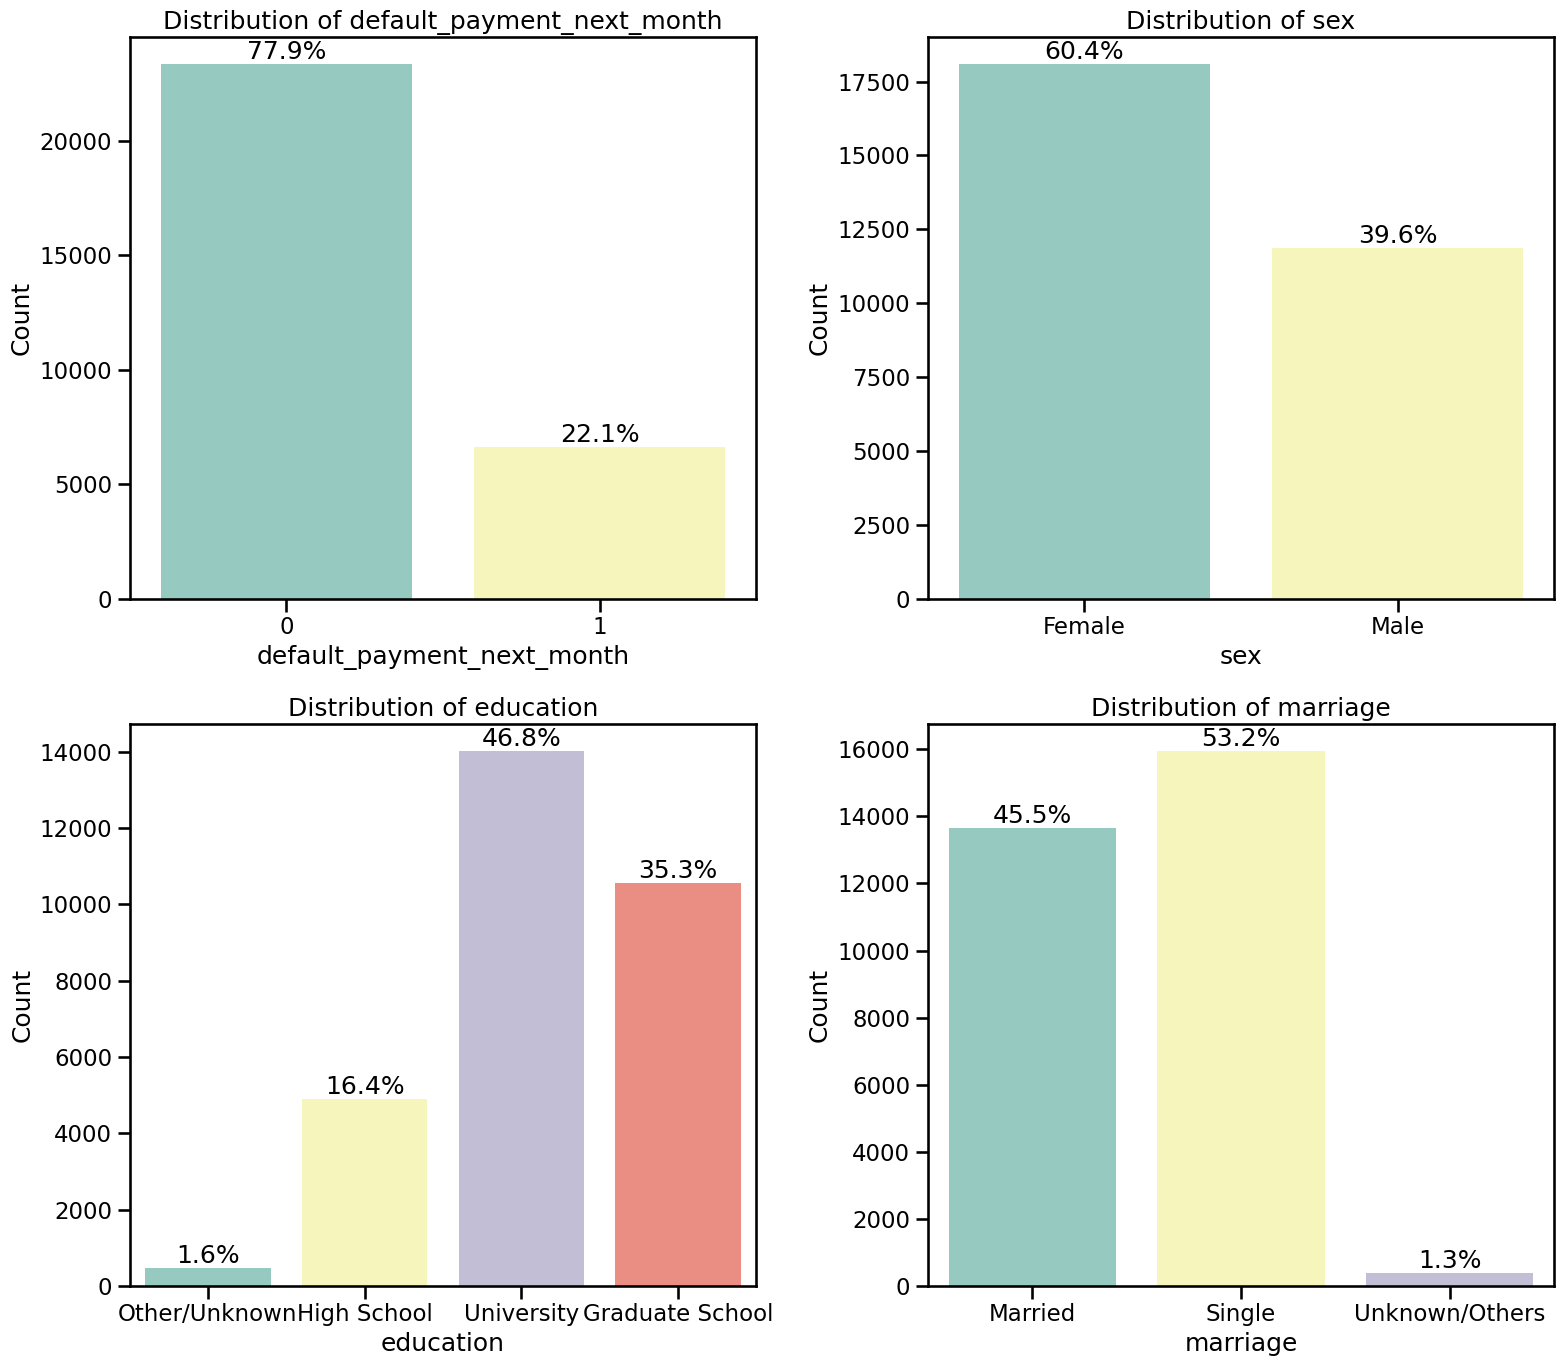

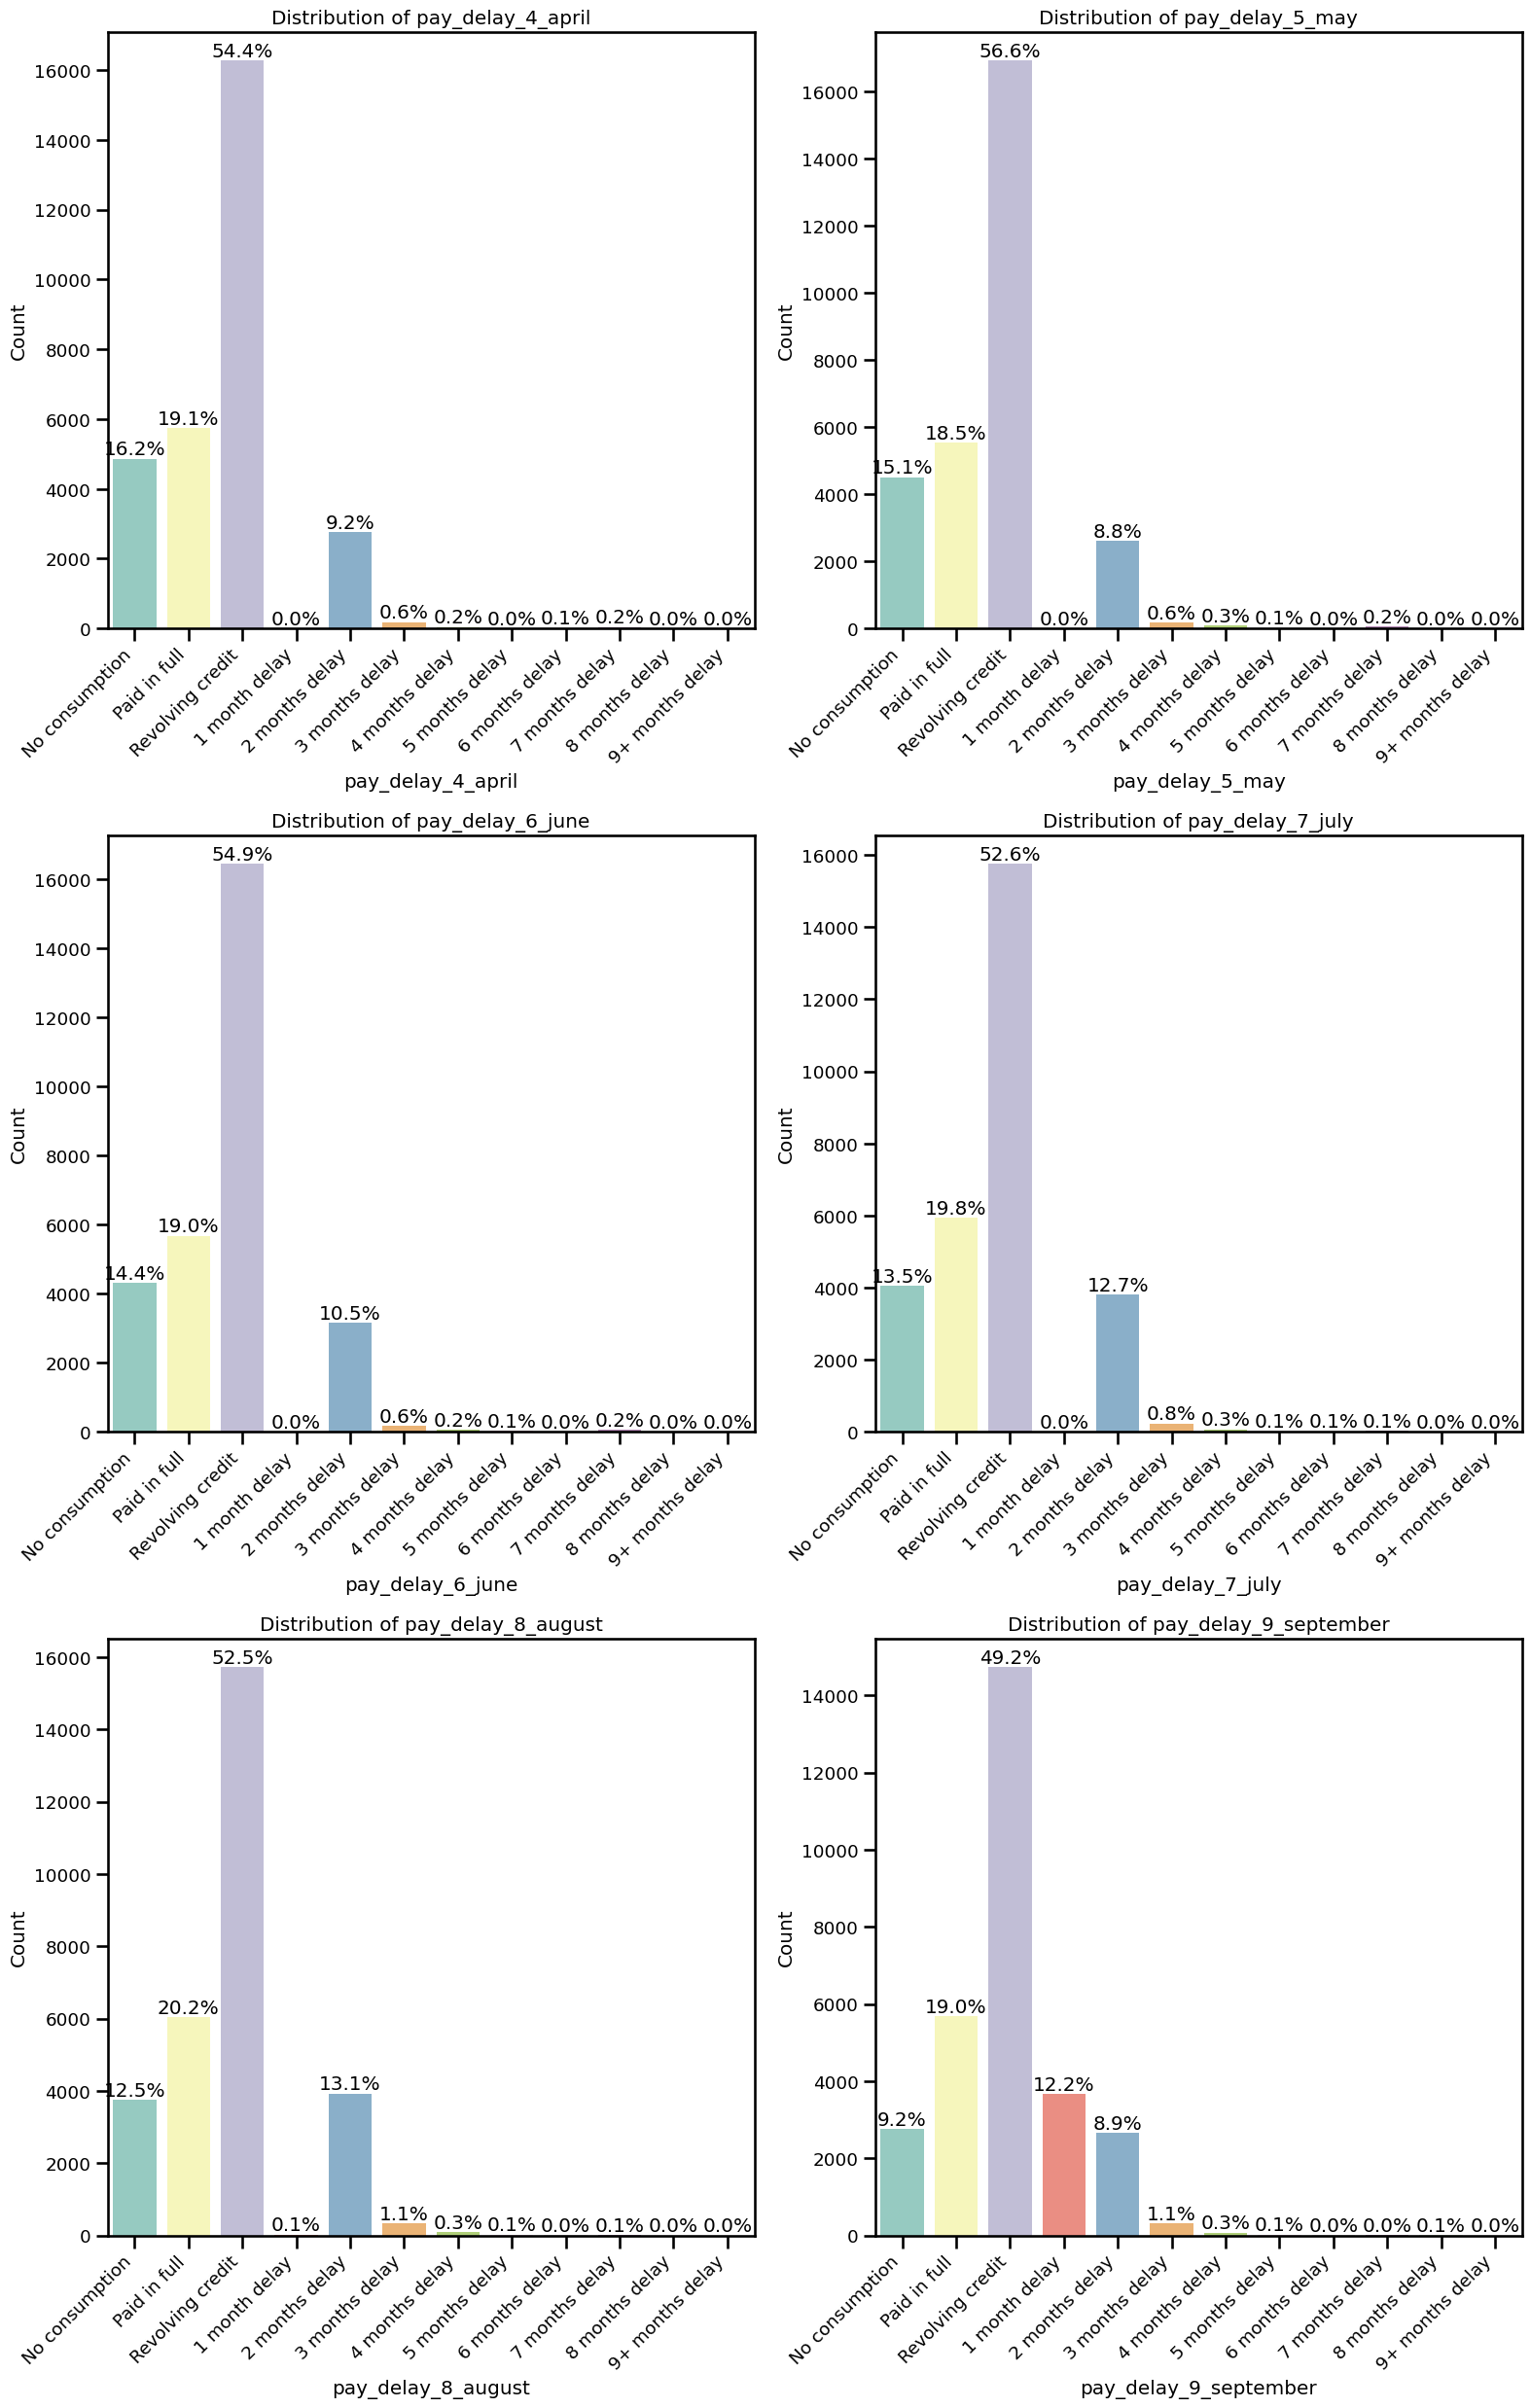

In [2]:
from categorical_data_utils import categorical_columns, ordinal_columns, plot_categorical_distributions, plot_ordinal_distributions

# Run the plotting functions
plot_categorical_distributions(df, categorical_columns)
plot_ordinal_distributions(df, ordinal_columns)

### Identify Small Categories

### Part 1: Threshold-Based Analysis
Here, we’ll set a threshold for the minimum number or percentage of samples a category should have. Categories below this threshold will be flagged for further analysis.

1. **Setting the Threshold**: Let’s start with a threshold for both the count and percentage. For example, we could flag categories that represent less than 1% of the total data.

2. **Identifying Small Categories**: We’ll loop through each categorical and ordinal column, check the frequency of each category, and flag any that fall below the threshold.

### Part 2: Cross-Feature Analysis
Once we have identified the small categories, we can analyze their relationship with the target variable (`default_payment_next_month`) using statistical tests, such as the chi-square test.

1. **Chi-Square Test**: We’ll test whether the distribution of the small categories is independent of the target variable. If the result is significant, the category may still be important despite its small size.


### Explanation:
1. **Threshold-Based Analysis**: Identifies categories that have a low count or represent a small percentage of the total data.
2. **Cross-Feature Analysis (Chi-Square Test)**: Determines if these small categories have a significant relationship with the target variable.

This approach helps you decide whether to combine, remove, or keep small categories based on their significance to the model.

Let me know if you need any adjustments!

In [3]:
import pandas as pd

def identify_small_categories(df, categorical_columns, ordinal_columns, threshold_percentage=1):
    """Identify small categories based on a percentage threshold."""
    small_categories = {}

    for column in categorical_columns + ordinal_columns:
        category_counts = df[column].value_counts(normalize=True) * 100
        small_categories[column] = category_counts[category_counts < threshold_percentage]

    return small_categories

# Set a threshold (e.g., 1% of the total data)
small_categories = identify_small_categories(df, categorical_columns, ordinal_columns, threshold_percentage=1)

# Display small categories
for column, small_cats in small_categories.items():
    if not small_cats.empty:
        print(f"Small categories in {column}:")
        print(small_cats)
        print()


Small categories in pay_delay_4_april:
pay_delay_4_april
3 months delay     0.614050
4 months delay     0.160187
7 months delay     0.153512
6 months delay     0.063407
5 months delay     0.043384
8 months delay     0.006674
1 month delay      0.000000
9+ months delay    0.000000
Name: proportion, dtype: float64

Small categories in pay_delay_5_may:
pay_delay_5_may
3 months delay     0.594026
4 months delay     0.276990
7 months delay     0.193559
5 months delay     0.056733
6 months delay     0.013349
8 months delay     0.003337
1 month delay      0.000000
9+ months delay    0.000000
Name: proportion, dtype: float64

Small categories in pay_delay_6_june:
pay_delay_6_june
3 months delay     0.600701
4 months delay     0.226931
7 months delay     0.193559
5 months delay     0.116803
6 months delay     0.016686
1 month delay      0.006674
8 months delay     0.006674
9+ months delay    0.000000
Name: proportion, dtype: float64

Small categories in pay_delay_7_july:
pay_delay_7_july
3 mont

### Chi-Square Test on Small Categories

In [4]:
from scipy.stats import chi2_contingency

def perform_chi_square_test(df, small_categories, target_column):
    significant_categories = {}

    for column, small_cats in small_categories.items():
        if not small_cats.empty:
            for category in small_cats.index:
                contingency_table = pd.crosstab(df[column] == category, df[target_column])
                chi2, p, _, _ = chi2_contingency(contingency_table)

                # Store significant results
                if p < 0.05:  # Using a significance level of 0.05
                    if column not in significant_categories:
                        significant_categories[column] = []
                    significant_categories[column].append((category, p))

    return significant_categories

# Run the chi-square tests
significant_categories = perform_chi_square_test(df, small_categories, target_column='default_payment_next_month')

# Display significant categories
for column, results in significant_categories.items():
    print(f"Significant small categories in {column}:")
    for category, p_value in results:
        print(f"  Category: {category}, p-value: {p_value:.4f}")
    print()


Significant small categories in pay_delay_4_april:
  Category: 3 months delay, p-value: 0.0000
  Category: 4 months delay, p-value: 0.0000
  Category: 7 months delay, p-value: 0.0000
  Category: 6 months delay, p-value: 0.0000
  Category: 5 months delay, p-value: 0.0154

Significant small categories in pay_delay_5_may:
  Category: 3 months delay, p-value: 0.0000
  Category: 4 months delay, p-value: 0.0000
  Category: 7 months delay, p-value: 0.0000
  Category: 5 months delay, p-value: 0.0008

Significant small categories in pay_delay_6_june:
  Category: 3 months delay, p-value: 0.0000
  Category: 4 months delay, p-value: 0.0000
  Category: 7 months delay, p-value: 0.0000
  Category: 5 months delay, p-value: 0.0001

Significant small categories in pay_delay_7_july:
  Category: 3 months delay, p-value: 0.0000
  Category: 4 months delay, p-value: 0.0000
  Category: 7 months delay, p-value: 0.0000
  Category: 6 months delay, p-value: 0.0000
  Category: 5 months delay, p-value: 0.0003

Sign

### Chi-Square Interpretation

A p-value of less than 0.05 in the context of a chi-square test indicates that there is a statistically significant relationship between the category and the target variable, at the 5% significance level.

### What This Means:
- **p-value < 0.05**: This means that the observed association between the specific category (e.g., "3 months delay") and the target variable (`default_payment_next_month`) is unlikely to have occurred by chance. Therefore, you reject the null hypothesis, which states that there is no association between the category and the target variable.
- **Statistical Significance**: The categories you identified with p-values less than 0.05 have a statistically significant relationship with loan defaults. In other words, customers in these categories (e.g., those with "3 months delay" in `pay_delay_4_april`) are more or less likely to default on their loans than customers in other categories.

### Example Interpretation:
- **Category: "3 months delay" in `pay_delay_4_april`**:
  - **p-value: 0.0000**: This extremely low p-value suggests a strong association between being in the "3 months delay" category and the likelihood of defaulting on a loan. This category is significantly different from the others in terms of its relationship with loan defaults.
  
- **Category: "5 months delay" in `pay_delay_4_april`**:
  - **p-value: 0.0154**: Although the p-value is higher than some others, it is still below 0.05, indicating a statistically significant association between the "5 months delay" category and loan defaults.

- **Significance**: All the categories with p-values below 0.05 have a statistically significant relationship with the likelihood of defaulting on a loan. This suggests that these specific delays are important factors in predicting loan defaults.
- **Implication for Modeling**: These significant categories could be considered for feature engineering or direct inclusion in your model, as they may help improve predictive accuracy.

#### Key Insights:

1. **High Significance Across Multiple Columns**:
   - Categories like "3 months delay," "4 months delay," and "7 months delay" consistently appear as significant in nearly all pay delay columns (e.g., April through September).
   - The p-values for these categories are extremely low (close to 0), indicating that these categories are strongly associated with loan default status.

2. **Impact of Different Delays**:
   - Even though these categories are small in proportion, their significance suggests they carry meaningful information about whether someone is likely to default.
   - Delays of "3 months," "4 months," and "7 months" may capture critical points in customer behavior that correlate with defaults.

3. **Implications for Handling Small Categories**:
   - **Preserve Significant Categories**: Categories like "3 months delay" and "4 months delay" should be kept in the dataset even if they represent a small portion of the overall data, as they have a significant impact on the target variable.



#### Pay Delay & Pay Amounts


Analyzing pay_delay_4_april vs. pay_amt_4_april
Spearman Correlation: 0.1960


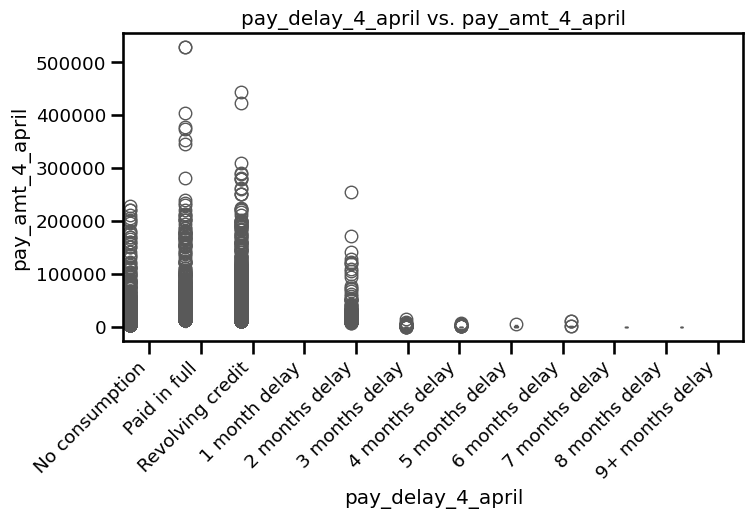

Kruskal-Wallis test p-value: 0.0000

Analyzing pay_delay_5_may vs. pay_amt_5_may
Spearman Correlation: 0.1829


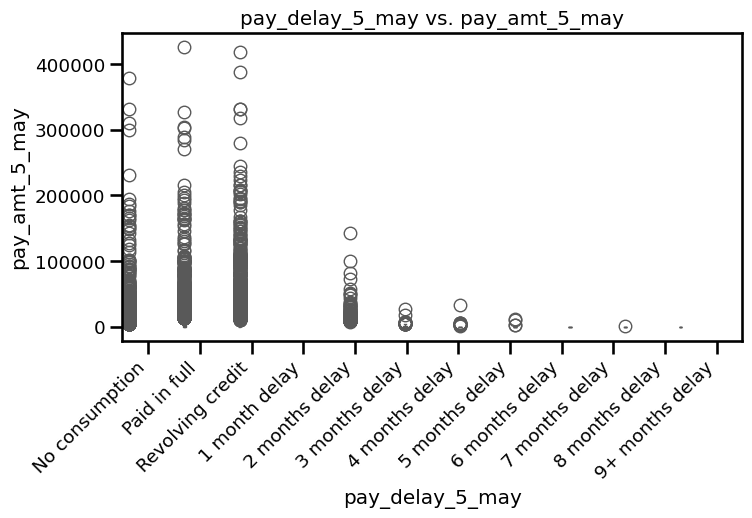

Kruskal-Wallis test p-value: 0.0000

Analyzing pay_delay_6_june vs. pay_amt_6_june
Spearman Correlation: 0.1423


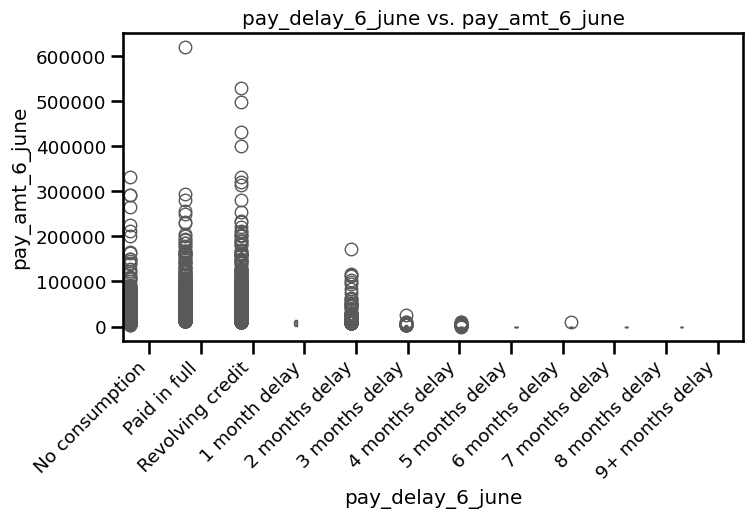

Kruskal-Wallis test p-value: 0.0000

Analyzing pay_delay_7_july vs. pay_amt_7_july
Spearman Correlation: 0.1011


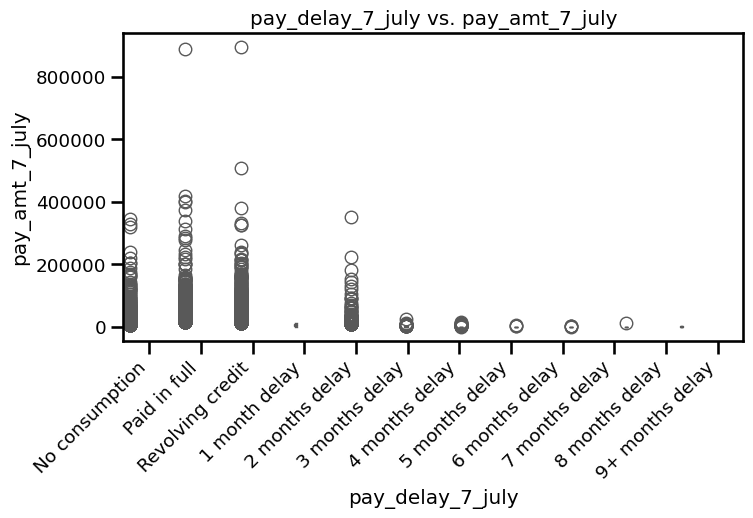

Kruskal-Wallis test p-value: 0.0000

Analyzing pay_delay_8_august vs. pay_amt_8_august
Spearman Correlation: 0.0811


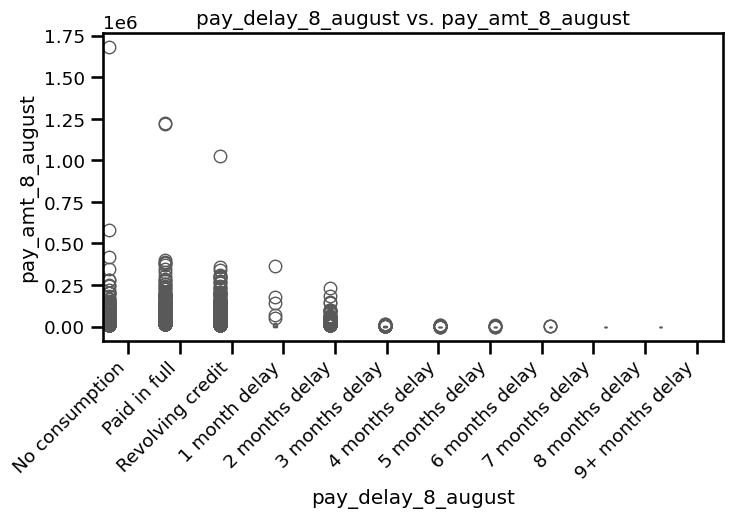

Kruskal-Wallis test p-value: 0.0000

Analyzing pay_delay_9_september vs. pay_amt_9_september
Spearman Correlation: -0.0979


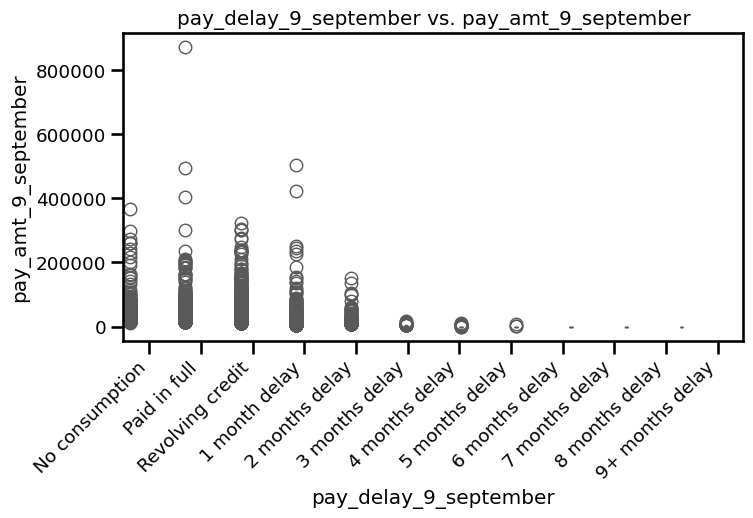

Kruskal-Wallis test p-value: 0.0000


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kruskal

def analyze_delay_vs_payment(df):
    delay_columns = [
        'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
        'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
    ]

    payment_columns = [
        'pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june',
        'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september'
    ]

    for delay_col, payment_col in zip(delay_columns, payment_columns):
        print(f"\nAnalyzing {delay_col} vs. {payment_col}")

        # Correlation Analysis
        correlation, _ = spearmanr(df[delay_col].cat.codes, df[payment_col])
        print(f"Spearman Correlation: {correlation:.4f}")

        # Group Analysis
        grouped_payments = df.groupby(delay_col, observed=True)[payment_col].mean()
        # print(grouped_payments)

        # Plotting
        plt.figure(figsize=(8,4))
        sns.boxplot(data=df, x=delay_col, y=payment_col, hue=delay_col, palette='Set2')
        plt.title(f'{delay_col} vs. {payment_col}')
        plt.xticks(rotation=45, ha='right')
        plt.show()

        # Significance Testing
        grouped_data = [df[df[delay_col] == category][payment_col] for category in df[delay_col].unique()]
        stat, p_value = kruskal(*grouped_data)
        print(f"Kruskal-Wallis test p-value: {p_value:.4f}")

# Run the analysis
analyze_delay_vs_payment(df)


The results—weak Spearman correlation combined with a statistically significant Kruskal-Wallis test—can  seem conflicting at first glance, but they can be interpreted together to understand the nature of the relationship between payment delays and payment amounts.

#### Interpreting the Results:

1. **Spearman Correlation (0.1960)**:
   - **What It Tells You**: The Spearman correlation of 0.1960 indicates a weak positive relationship between `pay_delay_4_april` and `pay_amt_4_april`. This means that, on average, as the delay category increases (indicating more severe delays), the payment amount tends to increase or decrease slightly in a consistent manner. However, the relationship is not strong, meaning that there is considerable variation in payment amounts that is not explained by the delay category alone.

2. **Kruskal-Wallis Test (p-value < 0.05)**:
   - **What It Tells You**: The Kruskal-Wallis test is a non-parametric test that compares the distribution of payment amounts across the different delay categories. A p-value less than 0.05 indicates that there are statistically significant differences in the payment amounts across these categories. This means that at least one delay category has a significantly different payment pattern compared to others.
   - **Why It Might Differ from Correlation**: The Kruskal-Wallis test is sensitive to differences in medians between groups, whereas the Spearman correlation measures overall monotonic trends. The weak correlation might suggest that the trend isn’t strong across the entire range of data, but the significant p-value indicates that differences exist between specific categories.

### Conclusion:
- **Weak Correlation**: The weak Spearman correlation suggests that payment delays and amounts are not strongly related in a linear or monotonic way.
- **Significant Differences**: The Kruskal-Wallis test indicates that there are differences in payment amounts across delay categories, but this might not directly translate into improving your model for predicting loan defaults.
- **Focus on Defaults**: Given your goal, you might achieve better results by focusing on relationships that directly impact the likelihood of loan defaults rather than on payment amounts unless these payment behaviors can be shown to significantly predict defaults.



## Feature Engineering









### 1. **Binary Risk Feature**:
We can create a binary feature that flags customers with delays of 3 months or more as “high risk.” This is simple but effective in helping the model distinguish between risky and non-risky customers.

- **Explanation**: This feature will be `True` (1) if a customer has a delay of 3 months or more in any month and `False` (0) otherwise.

In [6]:
df['high_risk_delay'] = df[[
    'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
    'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
]].apply(lambda row: any(delay in ['3 months delay', '4 months delay', '5 months delay',
                                   '6 months delay', '7 months delay', '8 months delay',
                                   '9+ months delay'] for delay in row), axis=1)

df['high_risk_delay'].value_counts()

,count
high_risk_delay,
False,28773
True,1192


Let's break down the creation of the `high_risk_delay` feature and why it might be a valuable addition to your dataset.

#### What Does `high_risk_delay` Represent?

The `high_risk_delay` feature is designed to identify customers who have experienced significant delays in their payments over a period of time. Specifically, it flags any customer who has had a delay of 3 months or more in any of the months analyzed (`April` to `September`).

### Why Is This Feature Useful?

- **Risk Identification**: Customers with significant delays (3 months or more) are likely at higher risk of defaulting on their loans. By identifying these customers, the model can focus on patterns that are strongly associated with default risk.
- **Simplification**: Instead of analyzing each delay column separately, this feature condenses the information into a single binary indicator of risk, simplifying the analysis and potentially improving model performance.
- **Predictive Power**: In a model, this binary feature could be highly predictive of loan defaults, as it directly captures behavior that is likely correlated with financial distress.

### How to Interpret the Results:

- **`True` Values**: A `True` value in `high_risk_delay` indicates that the customer had at least one delay of 3 months or more in the given period. This group of customers is likely more prone to default.
- **`False` Values**: A `False` value indicates that the customer had no significant delays in the given period, suggesting a lower risk of default.

### Next Steps:

- **Analyze the Distribution**: Check the proportion of `True` vs. `False` in your data to understand how many customers fall into the high-risk category.
- **Model Testing**: Incorporate this feature into your model to see if it improves predictive accuracy, particularly for identifying loan defaults (Class 1).



In [7]:
# Convert high_risk_delay to a categorical feature
df['high_risk_delay'] = df['high_risk_delay'].map({True: 'high risk', False: 'low risk'})
df['high_risk_delay'].value_counts()

,count
high_risk_delay,
low risk,28773
high risk,1192


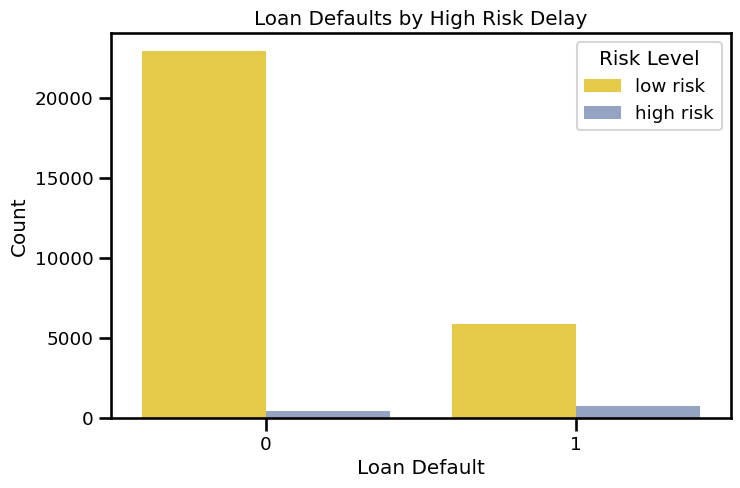

In [8]:
# Plot loan defaults with hue='high_risk_delay'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='default_payment_next_month', hue='high_risk_delay', palette='Set2_r')
plt.title('Loan Defaults by High Risk Delay')
plt.xlabel('Loan Default')
plt.ylabel('Count')
plt.legend(title='Risk Level')
plt.show()

In [9]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['high_risk_delay'], df['default_payment_next_month'])

# Perform the chi-square test
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-Square Test Results:")
print(f"Chi2: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Test Results:
Chi2: 1191.5553
p-value: 0.0000
Degrees of Freedom: 1


The results of the chi-square test indicate a strong and statistically significant relationship between the `high_risk_delay` feature and loan defaults. Here's how to interpret the results:

#### Interpretation of Chi-Square Test Results:

1. **Chi-Square Value (Chi2: 1191.5553)**:
   - The chi-square value is a measure of how much the observed data deviates from what would be expected if there were no relationship between `high_risk_delay` and loan defaults.
   - A high chi-square value, like 1191.5553, suggests that there is a substantial difference between the expected and observed counts in the contingency table, indicating a strong association between the two variables.

2. **p-value (0.0000)**:
   - The p-value tells you the probability that the observed association (or a more extreme one) could have occurred by chance if there were actually no association between `high_risk_delay` and loan defaults.
   - A p-value of 0.0000 (or effectively very close to zero) is far below the common threshold of 0.05, indicating that the association is statistically significant. This means that there is strong evidence to reject the null hypothesis, which in this case suggests that the `high_risk_delay` feature is indeed associated with loan defaults.

3. **Degrees of Freedom (1)**:
   - Degrees of freedom (dof) refers to the number of independent values or quantities that can vary in the analysis. In this case, with two categories ('low risk' and 'high risk') in `high_risk_delay` and two outcomes in `default_payment_next_month` (default or no default), the degrees of freedom are 1.

### Conclusion:
- **Significant Relationship**: The results indicate a statistically significant relationship between `high_risk_delay` and loan defaults. Customers categorized as "high risk" are significantly more likely to default on their loans compared to those categorized as "low risk."
- **Model Implication**: The `high_risk_delay` feature is likely to be a valuable predictor in your model, especially if your goal is to achieve high recall and precision for predicting loan defaults (Class 1). This feature could help your model better identify those at risk of default.

### Next Steps:
- **Include in Model**: You should consider including the `high_risk_delay` feature in your predictive model, as it has demonstrated a strong and significant relationship with loan defaults.
- **Further Exploration**: You may also want to explore interaction effects with other features or create additional engineered features based on this analysis.


### 2. **Delay Count Feature**:
You can create a feature that counts the number of months a customer has a delay of 3 months or more. This quantifies the severity of the risk.

- **Explanation**: This feature counts how many months a customer has been severely delayed. Higher values indicate a greater risk.


In [10]:
df['severe_delay_count'] = df[[
    'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
    'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
]].apply(lambda row: sum(1 for delay in row if delay in ['3 months delay', '4 months delay', '5 months delay',
                                                         '6 months delay', '7 months delay', '8 months delay',
                                                         '9+ months delay']), axis=1)

df['severe_delay_count'].value_counts()

,count
severe_delay_count,
0,28773
1,652
2,231
4,153
3,98
5,32
6,26



#### What the `severe_delay_count` Feature Does:

1. **Counting Severe Delays**:
   - This feature counts the number of times a customer has experienced a "severe delay" (defined as delays of 3 months or more) across multiple payment delay columns.
   - Specifically, it looks at the columns representing payment delays for different months (April to September) and counts how many of these months fall into one of the severe delay categories ('3 months delay', '4 months delay', '5 months delay', '6 months delay', '7 months delay', '8 months delay', '9+ months delay').

2. **Result**:
   - After running this code, each customer will have a `severe_delay_count` value representing how many times they have experienced severe delays in the specified months.

### Difference from `high_risk_delay`:

- **`high_risk_delay`**:
  - **Binary Indicator**: This feature is a binary indicator. It simply flags whether a customer has experienced any severe delay (True or False).
  - **Simpler Signal**: It provides a simple yes/no signal about whether a customer has had any severe delays, without specifying how many.

- **`severe_delay_count`**:
  - **Count of Delays**: This feature provides a more detailed measure by counting the exact number of severe delays a customer has experienced.
  - **Quantitative Measure**: It gives more granular information than the `high_risk_delay` feature, as it not only indicates whether a customer is at risk but also how frequently they have encountered severe delays.

### Why This Feature is Useful:

- **Risk Assessment**: While `high_risk_delay` tells you if a customer is at risk, `severe_delay_count` gives you a sense of the severity of that risk. A customer with multiple severe delays is likely at a higher risk of default than one with just one severe delay.
- **Modeling Potential**: In a predictive model, `severe_delay_count` might provide a stronger signal because it quantifies the risk level rather than just indicating its presence.

### How You Might Use This Feature:

- **Direct Input**: You can use `severe_delay_count` directly as a feature in your model to predict loan defaults.
- **Feature Interaction**: You could also explore interactions between this feature and other features, such as loan amount or income, to see if the combination of factors provides even more predictive power.


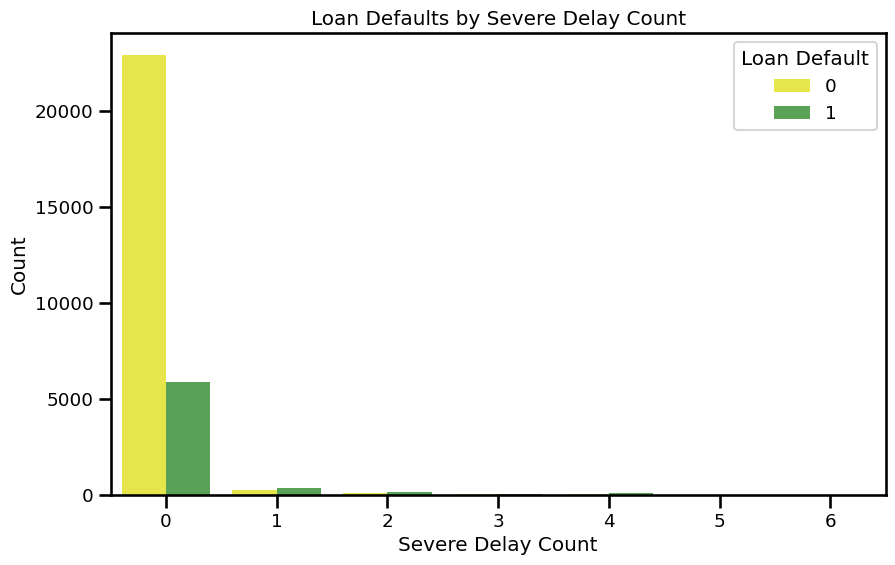

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot loan defaults with hue='severe_delay_count'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='severe_delay_count', hue='default_payment_next_month', palette='Set1_r')
plt.title('Loan Defaults by Severe Delay Count')
plt.xlabel('Severe Delay Count')
plt.ylabel('Count')
plt.legend(title='Loan Default')
plt.show()


In [12]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['severe_delay_count'], df['default_payment_next_month'])

# Perform the chi-square test
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-Square Test Results:")
print(f"Chi2: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Test Results:
Chi2: 1215.4374
p-value: 0.0000
Degrees of Freedom: 6


The results of the chi-square test indicate a strong and statistically significant relationship between the `severe_delay_count` feature and loan defaults. Here's how to interpret the results:

#### Interpretation of Chi-Square Test Results:

1. **Chi-Square Value (Chi2: 1215.4374)**:
   - **What It Indicates**: The chi-square value measures the difference between the observed data and what would be expected if there were no relationship between `severe_delay_count` and loan defaults. A high chi-square value like 1215.4374 suggests a substantial deviation from what would be expected under the null hypothesis, indicating a strong association between these variables.

2. **p-value (0.0000)**:
   - **Statistical Significance**: A p-value of 0.0000 (or effectively very close to zero) is far below the typical significance threshold of 0.05. This means there is extremely strong evidence against the null hypothesis, which posits that there is no association between `severe_delay_count` and loan defaults.
   - **Conclusion**: The p-value indicates that the differences in loan default rates across the different counts of severe delays are statistically significant.

3. **Degrees of Freedom (6)**:
   - **Explanation**: Degrees of freedom in this context reflect the number of categories in the `severe_delay_count` feature minus one. With six degrees of freedom, it suggests that there are multiple categories of `severe_delay_count` (likely ranging from 0 to 6 or more).

### What These Results Mean:

- **Significant Relationship**: The results suggest that the number of severe delays a customer has experienced is strongly associated with their likelihood of defaulting on a loan. Customers with higher counts of severe delays are more likely to default, and this relationship is statistically significant.
- **Implication for Modeling**: The `severe_delay_count` feature is likely to be an important predictor in your model, especially if your goal is to predict loan defaults. This feature captures a meaningful pattern in the data that is strongly related to the target variable (loan defaults).

### Next Steps:

- **Incorporate in Model**: Given the strong statistical significance, you should consider including the `severe_delay_count` feature in your predictive model.
- **Further Analysis**: You might also explore how this feature interacts with others or consider different ways of using this feature (e.g., binning into broader categories if needed).

Would you like to explore the visual distribution of this feature or move on to applying these insights to your model?

### 3. **Average Payment for Severe Delays**:
You can create a feature that calculates the average payment amount during months with severe delays (3 months or more). This feature helps the model understand whether customers are making any meaningful payments when they are significantly delayed.

- **Explanation**: This feature calculates the average payment amount for months where the customer had severe delays. Low values might indicate high risk.

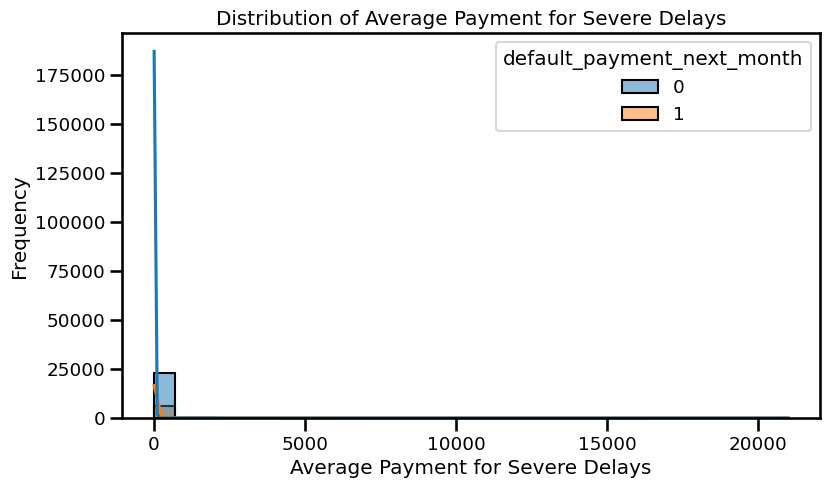

Kruskal-Wallis Test Results:
Statistic: 542.5800
p-value: 0.0000


In [13]:
def calculate_avg_payment_for_severe_delays(row):
    delays = ['3 months delay', '4 months delay', '5 months delay', '6 months delay', '7 months delay', '8 months delay', '9+ months delay']
    total_payment = 0
    severe_delay_months = 0
    # Adjusting column references to match your dataset
    for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']):
        if row[f'pay_delay_{i+4}_{month}'] in delays:
            total_payment += row[f'pay_amt_{i+4}_{month}']
            severe_delay_months += 1
    return total_payment / severe_delay_months if severe_delay_months > 0 else 0

df['avg_payment_severe_delays'] = df.apply(calculate_avg_payment_for_severe_delays, axis=1)

# Plotting the distribution of avg_payment_severe_delays
plt.figure(figsize=(9, 5))
sns.histplot(data=df, x='avg_payment_severe_delays', bins=30, kde=True, hue='default_payment_next_month')
plt.title('Distribution of Average Payment for Severe Delays')
plt.xlabel('Average Payment for Severe Delays')
plt.ylabel('Frequency')
plt.show()

from scipy.stats import kruskal

# Group the data by default_payment_next_month
grouped_data = [df[df['default_payment_next_month'] == category]['avg_payment_severe_delays'] for category in df['default_payment_next_month'].unique()]

# Perform the Kruskal-Wallis test
stat, p_value = kruskal(*grouped_data)

print(f"Kruskal-Wallis Test Results:")
print(f"Statistic: {stat:.4f}")
print(f"p-value: {p_value:.4f}")


In [14]:
df['avg_payment_severe_delays'].describe()

,avg_payment_severe_delays
count,29965.000000
mean,31.037515
std,371.736862
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,20995.750000


#### What is the Kruskal-Wallis Test?

The Kruskal-Wallis test is a non-parametric statistical test used to determine whether there are statistically significant differences between the distributions of a continuous variable across two or more independent groups. It is the non-parametric equivalent of the one-way ANOVA and is used when the assumptions of ANOVA (such as normality and homogeneity of variances) are not met.

### When to Use the Kruskal-Wallis Test:
- **Non-Normal Data**: The Kruskal-Wallis test is particularly useful when the data is not normally distributed, or when the sample sizes are small.
- **Ordinal or Continuous Data**: It’s appropriate for continuous or ordinal data that you want to compare across different groups (e.g., comparing payment amounts across different categories of loan defaults).
- **More than Two Groups**: While you can use it for two groups, it’s most commonly used when comparing more than two groups.

### How It Works:
- **Ranking Data**: The test ranks all the data points across the groups together.
- **Comparing Ranks**: It then compares the sum of ranks for each group to determine if there is a statistically significant difference between the groups.
- **Null Hypothesis**: The null hypothesis (H0) is that the distributions of the groups are the same (i.e., there are no differences in medians).
- **Alternative Hypothesis**: The alternative hypothesis (H1) is that at least one group differs in its distribution.

### Kruskal-Wallis Test in the Context of Your Data:
- **Application**: Using the Kruskal-Wallis test to compare the distribution of `avg_payment_severe_delays` (a continuous feature) across different categories of the `default_payment_next_month` variable (which has two groups: default and no default).
- **Purpose**: The purpose is to determine if there is a significant difference in the average payments made during severe delay months between customers who default and those who do not.

### Interpretation of the Kruskal-Wallis Test Results:
- **p-value**: If the p-value is less than a chosen significance level (usually 0.05), you reject the null hypothesis. This would indicate that there is a statistically significant difference between the groups.
- **Implication for Feature Selection**: A significant p-value suggests that the feature is relevant for distinguishing between the groups and may be valuable in your predictive model.



The results of the Kruskal-Wallis test indicate a strong and statistically significant difference in the distribution of the `avg_payment_severe_delays` feature between the groups defined by the `default_payment_next_month` variable. Here’s how to interpret the results:

#### Interpretation of Kruskal-Wallis Test Results:

1. **Kruskal-Wallis Statistic (542.5800)**:
   - **What It Represents**: The Kruskal-Wallis statistic measures how much the rank-sums of `avg_payment_severe_delays` differ between the groups (in this case, between customers who defaulted and those who did not).
   - **High Value**: A high Kruskal-Wallis statistic, like 542.5800, suggests that there is a significant difference in the ranks of `avg_payment_severe_delays` between the two groups. This means that the payment behavior during severe delays differs substantially between customers who default and those who do not.

2. **p-value (0.0000)**:
   - **Statistical Significance**: A p-value of 0.0000 (or very close to zero) is far below the typical significance threshold of 0.05. This means that the observed differences in `avg_payment_severe_delays` between the groups are highly unlikely to have occurred by chance.
   - **Conclusion**: The p-value indicates that the differences in average payments during severe delay periods between defaulters and non-defaulters are statistically significant.

### What These Results Mean:

- **Significant Relationship**: The Kruskal-Wallis test results suggest that there is a significant relationship between the amount a customer pays during severe delays and their likelihood of defaulting on a loan.
  - **Lower Payments, Higher Risk**: If the distribution shows that customers who default tend to have lower average payments during severe delay periods, this feature could be a strong indicator of default risk.
  - **Higher Payments, Lower Risk**: Conversely, if higher average payments during severe delays are associated with non-defaulting, this feature could indicate financial resilience.

### Implication for Modeling:

- **Feature Importance**: Given the statistically significant relationship, `avg_payment_severe_delays` is likely an important feature to include in your predictive model. It provides insight into payment behavior that is correlated with default risk.
- **Model Performance**: Incorporating this feature could potentially improve your model’s ability to distinguish between customers who are likely to default and those who are not, leading to better recall and precision for class 1 (loan defaults).



### 4. **Deferred & Decreasing Payments**

1. **Combining Indicators of Risk**:
   - **Deferred Payments**: Customers with deferred payments are already showing signs of financial difficulty.
   - **Decreasing Payments**: If their payment amounts are also decreasing over time, this might indicate worsening financial conditions, increasing the risk of default.
   - **Combined Signal**: By combining these two indicators into a single feature, you create a stronger signal of financial distress that could be highly predictive of loan defaults.

2. **Capturing Behavioral Patterns**:
   - **Trend Analysis**: Decreasing payments in the face of deferred payments might suggest that the customer is struggling more each month, which is a valuable pattern for the model to learn.
   - **Proactive Risk Identification**: This feature could help the model identify high-risk customers earlier, potentially improving recall for class 1 (loan defaults).

### Explanation:
- **Deferred Payments**: The function first checks if the customer has any deferred payments (using the same logic as the previous features).
- **Decreasing Payments**: It then checks if the payment amounts are decreasing from one month to the next.
- **Combined Flag**: The feature `flag_deferred_and_decreasing` will be `True` if both conditions are met.


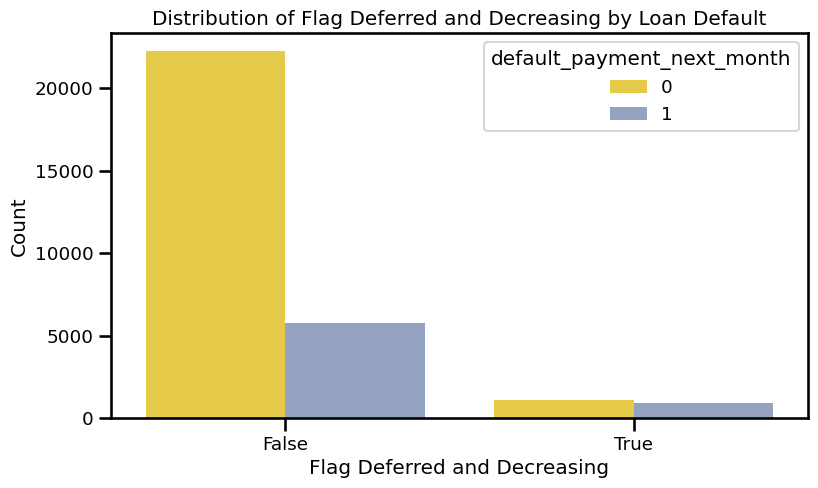

Chi-Square Test Results:
Chi2: 620.6247
p-value: 0.0000
Degrees of Freedom: 1


In [15]:
def flag_deferred_and_decreasing_payments(row):
    """Identify if payments are decreasing starting from any month with any delay."""
    delays = ['1 month delay', '2 months delay', '3 months delay',
              '4 months delay', '5 months delay', '6 months delay',
              '7 months delay', '8 months delay', '9+ months delay']

    # Initialize list to store payments in months with any delay
    delay_payments = []

    # Iterate over the months and collect payments for any delay
    for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']):
        if row[f'pay_delay_{i+4}_{month}'] in delays:
            delay_payments.append(row[f'pay_amt_{i+4}_{month}'])

    # Check if payments are decreasing over time
    for j in range(1, len(delay_payments)):
        if delay_payments[j] > delay_payments[j-1]:
            return False  # Payments are not consistently decreasing

    return True if len(delay_payments) > 1 else False  # Return True if payments are decreasing

# Apply the function to create the flag
df['flag_deferred_and_decreasing'] = df.apply(flag_deferred_and_decreasing_payments, axis=1)

# Plotting the distribution of flag_deferred_and_decreasing with hue set to loan defaults
plt.figure(figsize=(9, 5))
sns.countplot(data=df, x='flag_deferred_and_decreasing', hue='default_payment_next_month', palette='Set2_r')
plt.title('Distribution of Flag Deferred and Decreasing by Loan Default')
plt.xlabel('Flag Deferred and Decreasing')
plt.ylabel('Count')
plt.show()

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['flag_deferred_and_decreasing'], df['default_payment_next_month'])

# Perform the chi-square test
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-Square Test Results:")
print(f"Chi2: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

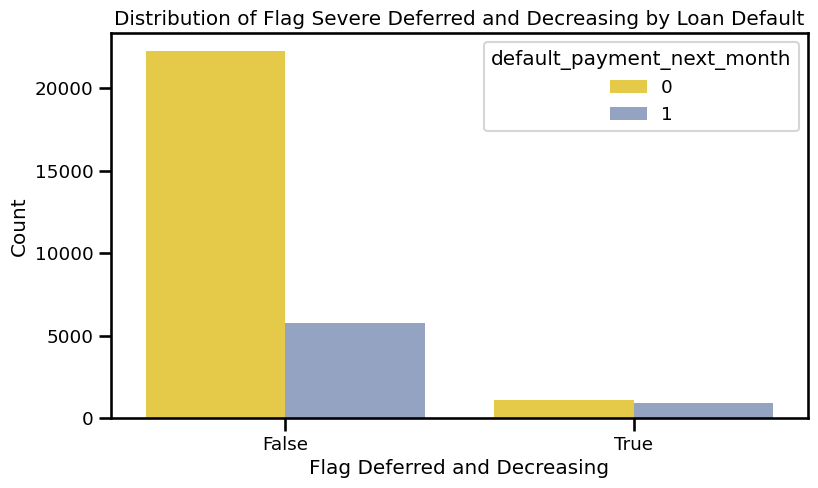

Chi-Square Test Results:
Chi2: 620.6247
p-value: 0.0000
Degrees of Freedom: 1


In [16]:
def flag_severe_deferred_and_decreasing_payments(row):
    delays = ['3 months delay', '4 months delay', '5 months delay',
              '6 months delay', '7 months delay', '8 months delay', '9+ months delay']

    # Check if there are deferred payments
    deferred = any(row[f'pay_delay_{i+4}_{month}'] in delays for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']))

    # Check if payments are decreasing
    payments = [row[f'pay_amt_{i+4}_{month}'] for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september'])]
    decreasing = all(x >= y for x, y in zip(payments, payments[1:]))

    # Return True if both conditions are met
    return deferred and decreasing

# Apply the function to create the flag
df['flag_severe_deferred_and_decreasing'] = df.apply(flag_deferred_and_decreasing_payments, axis=1)

# Plotting the distribution of flag_deferred_and_decreasing with hue set to loan defaults
plt.figure(figsize=(9, 5))
sns.countplot(data=df, x='flag_severe_deferred_and_decreasing', hue='default_payment_next_month', palette='Set2_r')
plt.title('Distribution of Flag Severe Deferred and Decreasing by Loan Default')
plt.xlabel('Flag Deferred and Decreasing')
plt.ylabel('Count')
plt.show()

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['flag_severe_deferred_and_decreasing'], df['default_payment_next_month'])

# Perform the chi-square test
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-Square Test Results:")
print(f"Chi2: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")


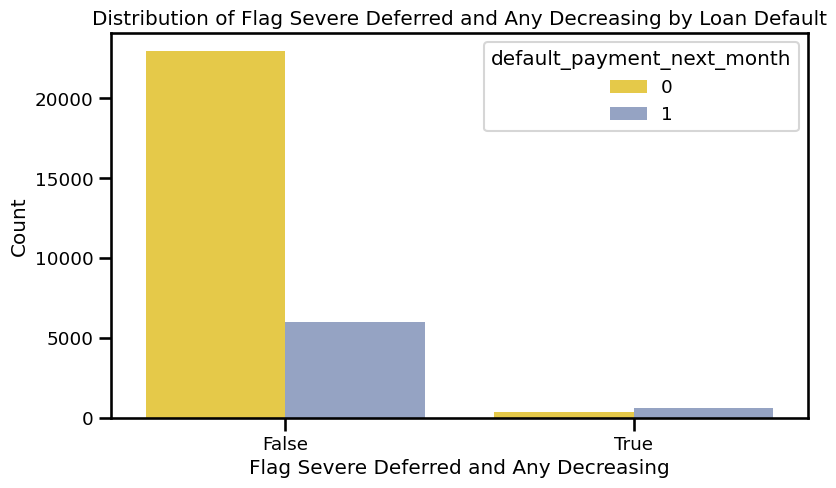

Chi-Square Test Results:
Chi2: 926.4732
p-value: 0.0000
Degrees of Freedom: 1


In [17]:
def flag_severe_deferred_and_any_decreasing_payments(row):
    delays = ['3 months delay', '4 months delay', '5 months delay',
              '6 months delay', '7 months delay', '8 months delay', '9+ months delay']

    # Check if there are severe deferred payments
    deferred = any(row[f'pay_delay_{i+4}_{month}'] in delays for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']))

    # Check if payments are decreasing (any decrease)
    payments = [row[f'pay_amt_{i+4}_{month}'] for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september'])]
    decreasing = any(x > y for x, y in zip(payments, payments[1:]))  # Any decrease in payments

    # Return True if both conditions are met
    return deferred and decreasing

# Apply the renamed function to create the flag
df['flag_severe_deferred_and_any_decreasing'] = df.apply(flag_severe_deferred_and_any_decreasing_payments, axis=1)

# Plotting the distribution of flag_severe_deferred_and_any_decreasing with hue set to loan defaults
plt.figure(figsize=(9, 5))
sns.countplot(data=df, x='flag_severe_deferred_and_any_decreasing', hue='default_payment_next_month', palette='Set2_r')
plt.title('Distribution of Flag Severe Deferred and Any Decreasing by Loan Default')
plt.xlabel('Flag Severe Deferred and Any Decreasing')
plt.ylabel('Count')
plt.show()


from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['flag_severe_deferred_and_any_decreasing'], df['default_payment_next_month'])

# Perform the chi-square test
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-Square Test Results:")
print(f"Chi2: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")


The Chi-Square test results for the function `flag_severe_deferred_and_any_decreasing_payments` are highly significant, indicating a strong relationship between the flag created by this function and the target variable, which is likely whether a loan defaults or not. Here's a detailed interpretation:

#### Chi-Square Test Results:
- **Chi2: 926.4732**:
  - This value represents the test statistic. A higher value indicates a stronger association between the categorical variables being tested—in this case, the `flag_severe_deferred_and_any_decreasing_payments` and loan default status.
- **p-value: 0.0000**:
  - The p-value is very close to zero, which means that the observed association is highly unlikely to have occurred by chance. In most practical scenarios, a p-value below 0.05 is considered statistically significant. Here, a p-value of 0.0000 indicates a very strong significance.
- **Degrees of Freedom: 1**:
  - This indicates the number of categories minus one in your data. Since this is a binary flag (True/False), there are 2 categories, so the degrees of freedom is 1.

### Interpretation:
1. **Strong Association**:
   - The high Chi-Square value (926.4732) combined with the very low p-value (0.0000) suggests that there is a strong association between the occurrence of severe payment delays combined with any decrease in payments and the likelihood of a loan default.

2. **Predictive Power**:
   - The results suggest that this feature (flag) is likely a strong predictor of loan default. Including this feature in your model could improve its ability to correctly identify loans that are at high risk of defaulting.

3. **Practical Implication**:
   - From a business perspective, this means that when a customer exhibits both severe payment delays and a subsequent decrease in payment amounts, they are statistically much more likely to default on their loan. This insight could be used to flag such customers for early intervention.

### Conclusion:
Given the strong statistical significance, this feature (flag) should be considered a valuable addition to your predictive model. It effectively captures a pattern in the data that is highly indicative of loan default risk, which aligns well with your goal of improving recall and precision for identifying potential defaults.

### 5. **Ratio of Severe Delays to Total Payments**:
Create a ratio feature that divides the total number of severe delays by the total payments made. This captures how “costly” severe delays are in terms of payments.

- **Explanation**: A higher ratio suggests more severe delays relative to payments made, indicating higher risk.

Number of NaN values in scaled_severe_delay_payment_ratio: 0


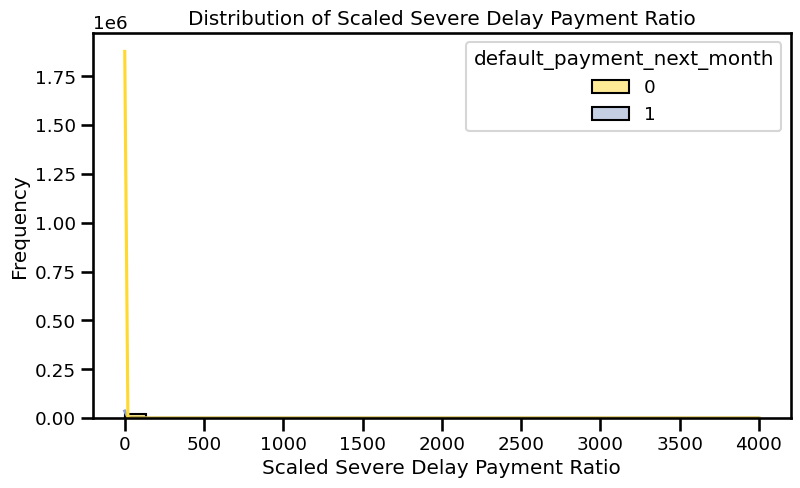

Kruskal-Wallis Test Results:
Statistic: 946.1045
p-value: 0.0000


In [18]:
def calculate_severe_delay_payment_ratio(row, scaling_factor=10000):
    total_payment = row[['pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june',
                         'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']].sum()

    # Prevent division by zero
    if total_payment == 0 or pd.isna(total_payment):
        return 0  # Avoid NaN by returning 0

    # Calculate the severe delay payment ratio
    ratio = row['severe_delay_count'] / total_payment

    # Apply scaling factor to make the ratio more meaningful
    return ratio * scaling_factor

# Apply the updated function to calculate and scale the severe_delay_payment_ratio
df['scaled_severe_delay_payment_ratio'] = df.apply(calculate_severe_delay_payment_ratio, axis=1)

# Check for any remaining NaN values in the newly created column
nan_inf_rows = df[df['scaled_severe_delay_payment_ratio'].isna()]
print(f"Number of NaN values in scaled_severe_delay_payment_ratio: {nan_inf_rows.shape[0]}")

# Plotting the distribution of severe_delay_payment_ratio
plt.figure(figsize=(9,5))
sns.histplot(data=df, x='scaled_severe_delay_payment_ratio', bins=30, kde=True,
             hue='default_payment_next_month', palette='Set2_r')
plt.title('Distribution of Scaled Severe Delay Payment Ratio')
plt.xlabel('Scaled Severe Delay Payment Ratio')
plt.ylabel('Frequency')
plt.show()

from scipy.stats import kruskal

# Group the data by default_payment_next_month
grouped_data = [df[df['default_payment_next_month'] == category]['scaled_severe_delay_payment_ratio'] for category in df['default_payment_next_month'].unique()]

# Perform the Kruskal-Wallis test
stat, p_value = kruskal(*grouped_data)

print(f"Kruskal-Wallis Test Results:")
print(f"Statistic: {stat:.4f}")
print(f"p-value: {p_value:.4f}")



The results of the Kruskal-Wallis test indicate a strong and statistically significant relationship between the `scaled_severe_delay_payment_ratio` feature and loan defaults. Here's how to interpret the results:

#### Interpretation of Kruskal-Wallis Test Results:

1. **Kruskal-Wallis Statistic (946.1045)**:
   - **Magnitude of the Association**: The Kruskal-Wallis statistic measures the extent to which the distributions of the `scaled_severe_delay_payment_ratio` differ between the groups defined by the `default_payment_next_month` variable.
   - **High Value**: A statistic of 946.1045 is quite large, suggesting a substantial difference in the `scaled_severe_delay_payment_ratio` between customers who defaulted and those who did not. This indicates a strong association between this feature and loan defaults.

2. **p-value (0.0000)**:
   - **Statistical Significance**: A p-value of 0.0000 (or very close to zero) indicates that the observed differences in `scaled_severe_delay_payment_ratio` between the groups are highly unlikely to have occurred by chance.
   - **Conclusion**: The p-value confirms that the relationship between the `scaled_severe_delay_payment_ratio` and loan defaults is statistically significant. This suggests that the feature is an important predictor of loan defaults.

### What These Results Mean:

- **Significant Relationship**: The results strongly suggest that the `scaled_severe_delay_payment_ratio` feature is relevant for predicting loan defaults. Customers with higher ratios (indicating more severe delays relative to their total payments) are likely at a higher risk of defaulting.
- **Implication for Modeling**: Given the strong statistical significance, this feature should be considered for inclusion in your predictive model. It captures a critical aspect of customer payment behavior that is strongly related to default risk.


### 6. **Cumulative Delay Feature**:
You could also track the cumulative sum of delay levels (e.g., mapping "1 month delay" to 1, "2 months delay" to 2, etc.) across all months. This gives the model a sense of overall delinquency.


- **Explanation**: A higher cumulative delay value suggests chronic delinquency across multiple months.

### Summary:
These feature engineering ideas can enhance the model’s ability to capture the risk associated with payment delays. You can experiment with including one or more of these features and evaluate their impact on your model’s performance.

In [19]:
delay_mapping = {
    'No consumption': 0,
    'Paid in full': 0,
    'Revolving credit': 0,
    '1 month delay': 1,
    '2 months delay': 2,
    '3 months delay': 3,
    '4 months delay': 4,
    '5 months delay': 5,
    '6 months delay': 6,
    '7 months delay': 7,
    '8 months delay': 8,
    '9+ months delay': 9
}

df['cumulative_delay'] = df[[
    'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
    'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
]].apply(lambda row: sum(delay_mapping[delay] for delay in row), axis=1)


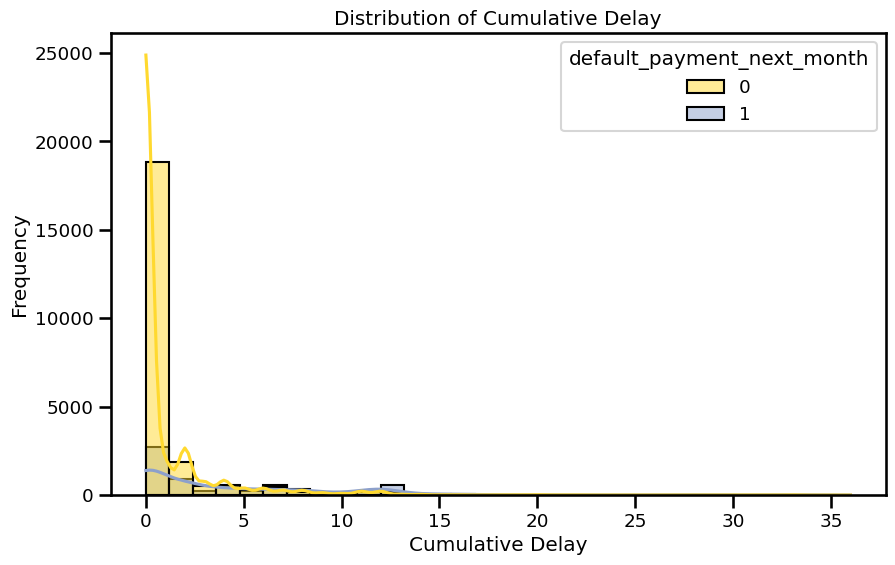

Kruskal-Wallis Test Results:
Statistic: 4571.0259
p-value: 0.0000


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of cumulative_delay
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='cumulative_delay', bins=30, kde=True,
             hue='default_payment_next_month', palette='Set2_r')
plt.title('Distribution of Cumulative Delay')
plt.xlabel('Cumulative Delay')
plt.ylabel('Frequency')
plt.show()

from scipy.stats import kruskal

# Group the data by default_payment_next_month
grouped_data = [df[df['default_payment_next_month'] == category]['cumulative_delay'] for category in df['default_payment_next_month'].unique()]

# Perform the Kruskal-Wallis test
stat, p_value = kruskal(*grouped_data)

print(f"Kruskal-Wallis Test Results:")
print(f"Statistic: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

The Kruskal-Wallis test results for the `cumulative_delay` feature are highly significant, indicating a strong relationship between the cumulative delay values and the target variable, likely whether a loan defaults or not. Here’s a detailed interpretation:

#### Kruskal-Wallis Test Results:
- **Statistic: 4571.0259**:
  - This is the test statistic, which measures the difference in distributions of the target variable (e.g., loan default) across different levels of the `cumulative_delay` feature. A higher statistic indicates a stronger difference between groups.
- **p-value: 0.0000**:
  - The p-value is extremely close to zero, indicating that the observed differences between the groups are highly unlikely to have occurred by chance. In typical hypothesis testing, a p-value below 0.05 is considered statistically significant. A p-value of 0.0000 suggests an exceptionally strong significance.

### Interpretation:
1. **Strong Association**:
   - The high Kruskal-Wallis statistic (4571.0259) and the extremely low p-value (0.0000) indicate a strong association between the `cumulative_delay` feature and the likelihood of loan default. This suggests that the cumulative sum of delays is a significant factor in determining whether a loan will default.

2. **Non-Parametric Test**:
   - The Kruskal-Wallis test is a non-parametric method, meaning it does not assume a normal distribution of the data. This makes it particularly useful when dealing with ordinal or skewed data, as may be the case with the `cumulative_delay` feature. The significant result here indicates that as the cumulative delay increases, the likelihood of loan default changes significantly.

3. **Feature Utility**:
   - The significant result suggests that `cumulative_delay` is a valuable feature for your predictive model. It captures the severity of payment delays across multiple months, which seems to be a strong indicator of loan default risk.

### Practical Implications:
- **Modeling**:
  - Including `cumulative_delay` in your predictive model is likely to improve its ability to distinguish between loans that are at high risk of defaulting and those that are not. This feature encapsulates the total extent of payment delays, providing a comprehensive view of a customer's payment behavior.

- **Risk Assessment**:
  - From a risk management perspective, customers with higher cumulative delays should be flagged as higher risk. This insight can be used to prioritize interventions or adjust loan terms to mitigate potential losses.

### Conclusion:
Given the strong statistical significance, the `cumulative_delay` feature is likely to be a powerful predictor of loan default in your model. It should be considered an important factor in your overall risk assessment and predictive modeling strategy.

### 7. **Cumulative Delay Feature Binned**:

Binning the `cumulative_delay` data into categories such as "low," "moderate," "high," and "severe" risk can be a useful approach, especially when you have a lot of zeros and only a few large values. This binning can help simplify the feature and make it more interpretable while still capturing the essence of the risk levels associated with different cumulative delays.

### Why Binning Makes Sense:

1. **Handling Skewed Data**: If your data is heavily skewed with many zeros and a few large values, binning can help normalize the distribution and reduce the impact of outliers.
2. **Simplification**: Binning the data into a few categories makes the feature easier to interpret and may help the model by reducing noise, especially if the exact numeric value of the delay isn't as important as the general risk category.
3. **Ordinal Feature**: By creating an ordinal feature that categorizes customers into "low," "moderate," "high," and "severe" risk, you maintain the ordinal nature of the original data while simplifying its structure.


### Explanation:
- **Bins**: The `bins` list defines the thresholds for each risk category. For example, you might define "low risk" as 0 cumulative delays, "moderate risk" as 1-4 delays, "high risk" as 5-9 delays, and "severe risk" as 10 or more delays.
- **Labels**: The `labels` list assigns a category name to each bin.
- **Binning**: The `pd.cut` function assigns each customer a risk category based on their `cumulative_delay`.



In [21]:
# Define the bins and labels
bins = [0, 1, 5, 10, float('inf')]  # Adjust these thresholds based on your data
labels = ['low', 'moderate', 'high', 'severe']

# Create the binned feature
df['cumulative_delay_risk'] = pd.cut(df['cumulative_delay'], bins=bins, labels=labels, right=False, ordered=True)

# Check the distribution of the new binned feature
print(df['cumulative_delay_risk'].value_counts())

cumulative_delay_risk
low         19918
moderate     6189
high         2214
severe       1644
Name: count, dtype: int64


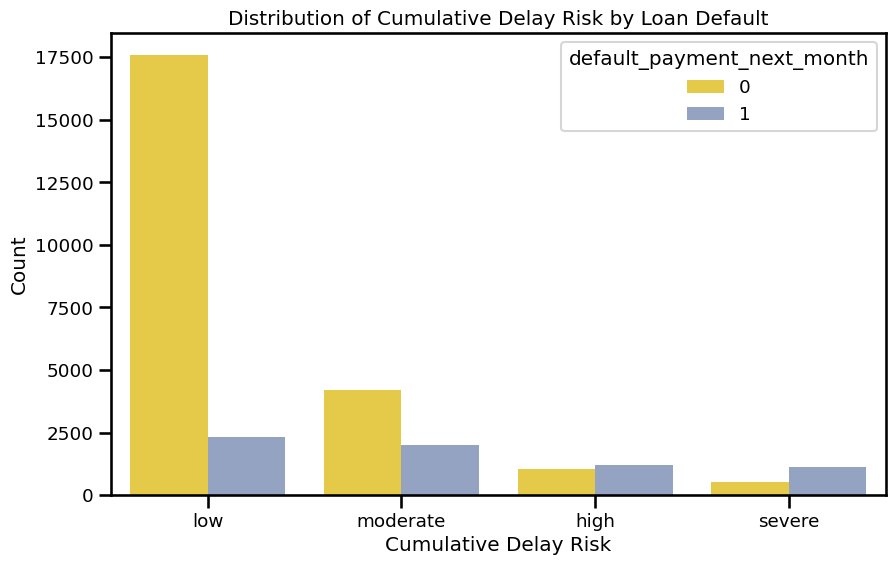

In [22]:

# Visualizing the distribution of cumulative_delay_risk
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cumulative_delay_risk', hue='default_payment_next_month', palette='Set2_r')
plt.title('Distribution of Cumulative Delay Risk by Loan Default')
plt.xlabel('Cumulative Delay Risk')
plt.ylabel('Count')
plt.show()


In [23]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['cumulative_delay_risk'], df['default_payment_next_month'])

# Perform the chi-square test
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-Square Test Results:")
print(f"Chi2: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Test Results:
Chi2: 4916.8994
p-value: 0.0000
Degrees of Freedom: 3


The results of the chi-square test indicate a very strong and statistically significant relationship between the `cumulative_delay_risk` feature and loan defaults. Here’s how to interpret these results:

#### Interpretation of Chi-Square Test Results:

1. **Chi-Square Value (Chi2: 4916.8994)**:
   - **Magnitude of the Association**: The chi-square value measures the difference between the observed and expected frequencies in the contingency table. A value of 4916.8994 is extremely high, suggesting a very strong association between the `cumulative_delay_risk` feature and the likelihood of loan defaults.
   - **Implication**: The high chi-square value indicates that the distribution of loan defaults across different levels of `cumulative_delay_risk` (low, moderate, high, severe) is significantly different from what would be expected if there were no association. This implies that the cumulative delay risk level is a strong indicator of whether a customer is likely to default on a loan.

2. **p-value (0.0000)**:
   - **Statistical Significance**: A p-value of 0.0000 (or very close to zero) indicates that the relationship between the `cumulative_delay_risk` feature and loan defaults is highly statistically significant. The likelihood that this relationship is due to random chance is virtually zero.
   - **Conclusion**: The p-value confirms that the differences in default rates across the risk categories are significant, suggesting that the `cumulative_delay_risk` feature is an important predictor in your model.

3. **Degrees of Freedom (3)**:
   - **Explanation**: The degrees of freedom in this test (3) correspond to the number of categories in the `cumulative_delay_risk` feature minus one. This reflects the comparison across the four ordinal categories: low, moderate, high, and severe.

### What These Results Mean:

- **Strong Predictive Power**: The `cumulative_delay_risk` feature is likely to be a highly effective predictor of loan defaults. Customers classified into higher risk categories (e.g., severe) are much more likely to default than those in lower risk categories.
- **Ordinal Feature Utility**: The fact that the feature is ordinal (with an inherent order) means that the model can leverage the progression from low to severe risk in a meaningful way, improving its ability to predict defaults.

### Next Steps:

- **Incorporate in Model**: Given the strong significance and the clear relationship with loan defaults, you should incorporate the `cumulative_delay_risk` feature into your predictive model.
- **Further Analysis**: You might also want to explore interactions between this feature and others to see if it can enhance model performance even further.

Would you like to proceed with incorporating this feature into your model, or is there another aspect you'd like to explore?

### Ratio & Interaction Features

In [24]:
import pandas as pd
import numpy as np

# 1. Interaction Features
# df['bill_to_payment_ratio_april'] = df['bill_amt_4_april'] / df['pay_amt_4_april'].replace(0, np.nan)
# df['bill_to_payment_ratio_may'] = df['bill_amt_5_may'] / df['pay_amt_5_may'].replace(0, np.nan)
# df['bill_to_payment_ratio_june'] = df['bill_amt_6_june'] / df['pay_amt_6_june'].replace(0, np.nan)
# df['bill_to_payment_ratio_july'] = df['bill_amt_7_july'] / df['pay_amt_7_july'].replace(0, np.nan)
# df['bill_to_payment_ratio_august'] = df['bill_amt_8_august'] / df['pay_amt_8_august'].replace(0, np.nan)
# df['bill_to_payment_ratio_september'] = df['bill_amt_9_september'] / df['pay_amt_9_september'].replace(0, np.nan)

# Replace 0 with a small value to avoid division by zero, then calculate the ratio
df['bill_to_payment_ratio_april'] = df['bill_amt_4_april'] / df['pay_amt_4_april'].replace(0, np.nan)
df['bill_to_payment_ratio_may'] = df['bill_amt_5_may'] / df['pay_amt_5_may'].replace(0, np.nan)
df['bill_to_payment_ratio_june'] = df['bill_amt_6_june'] / df['pay_amt_6_june'].replace(0, np.nan)
df['bill_to_payment_ratio_july'] = df['bill_amt_7_july'] / df['pay_amt_7_july'].replace(0, np.nan)
df['bill_to_payment_ratio_august'] = df['bill_amt_8_august'] / df['pay_amt_8_august'].replace(0, np.nan)
df['bill_to_payment_ratio_september'] = df['bill_amt_9_september'] / df['pay_amt_9_september'].replace(0, np.nan)

# After calculating the ratios, replace NaN values with 0
df['bill_to_payment_ratio_april'] = df['bill_to_payment_ratio_april'].fillna(0)
df['bill_to_payment_ratio_may'] = df['bill_to_payment_ratio_may'].fillna(0)
df['bill_to_payment_ratio_june'] = df['bill_to_payment_ratio_june'].fillna(0)
df['bill_to_payment_ratio_july'] = df['bill_to_payment_ratio_july'].fillna(0)
df['bill_to_payment_ratio_august'] = df['bill_to_payment_ratio_august'].fillna(0)
df['bill_to_payment_ratio_september'] = df['bill_to_payment_ratio_september'].fillna(0)

# Check the data to ensure NaNs have been replaced
print(df[['bill_to_payment_ratio_april', 'bill_to_payment_ratio_may', 'bill_to_payment_ratio_june',
          'bill_to_payment_ratio_july', 'bill_to_payment_ratio_august', 'bill_to_payment_ratio_september']].head())

# Calculate payment change features
df['payment_change_may'] = df['pay_amt_5_may'] - df['pay_amt_4_april']
df['payment_change_june'] = df['pay_amt_6_june'] - df['pay_amt_5_may']
df['payment_change_july'] = df['pay_amt_7_july'] - df['pay_amt_6_june']
df['payment_change_august'] = df['pay_amt_8_august'] - df['pay_amt_7_july']
df['payment_change_september'] = df['pay_amt_9_september'] - df['pay_amt_8_august']

# 2. Aggregate Features
df['total_payments'] = df[['pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june',
                           'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']].sum(axis=1)
df['total_bills'] = df[['bill_amt_4_april', 'bill_amt_5_may', 'bill_amt_6_june',
                        'bill_amt_7_july', 'bill_amt_8_august', 'bill_amt_9_september']].sum(axis=1)

df['avg_payment'] = df['total_payments'] / 6
df['avg_bill'] = df['total_bills'] / 6

# 3. Categorical Feature Interactions
df['education_marriage'] = df['education'].astype(str) + '_' + df['marriage'].astype(str)

df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20s', '30s', '40s', '50s', '60s', '70s'])
df['sex_age_group'] = df['sex'].astype(str) + '_' + df['age_group'].astype(str)

# 4. Temporal Features
df['payment_std'] = df[['pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june',
                        'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']].std(axis=1)

weights = [1, 2, 3, 4, 5, 6]  # Increasing weight for more recent months
df['weighted_payment_sum'] = (df[['pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june',
                                   'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']] * weights).sum(axis=1)

# 5. Debt-to-Income Proxy
df['debt_to_limit_ratio'] = df['total_bills'] / df['limit_bal']

# Check the new features
df.info()


   bill_to_payment_ratio_april  bill_to_payment_ratio_may  \
0                     0.000000                   0.000000   
1                     1.630500                   0.000000   
2                     3.109800                  14.948000   
3                    29.547000                  27.089804   
4                    28.175258                  27.788099   

   bill_to_payment_ratio_june  bill_to_payment_ratio_july  \
0                    0.000000                    0.000000   
1                    3.272000                    2.682000   
2                   14.331000                   13.559000   
3                   25.740000                   41.075833   
4                    2.326667                    3.583500   

   bill_to_payment_ratio_august  bill_to_payment_ratio_september  
0                      4.502177                         0.000000  
1                      1.725000                         0.000000  
2                      9.351333                        19.261528 

In [25]:
from scipy.stats import chi2_contingency, kruskal

# Initialize a list to hold the results
significance_results = []

# List of features to test
features_to_test = [
    'bill_to_payment_ratio_april', 'bill_to_payment_ratio_may', 'bill_to_payment_ratio_june',
    'bill_to_payment_ratio_july', 'bill_to_payment_ratio_august', 'bill_to_payment_ratio_september',
    'payment_change_may', 'payment_change_june', 'payment_change_july',
    'payment_change_august', 'payment_change_september',
    'total_payments', 'total_bills', 'avg_payment', 'avg_bill',
    'payment_std', 'weighted_payment_sum', 'debt_to_limit_ratio'
]

# Test for continuous features using Kruskal-Wallis test
for feature in features_to_test:
    grouped_data = [df[df['default_payment_next_month'] == category][feature] for category in df['default_payment_next_month'].unique()]
    stat, p_value = kruskal(*grouped_data)
    significance_results.append({'Feature': feature, 'Test': 'Kruskal-Wallis', 'Statistic': stat, 'p-value': p_value})

# Test for categorical features using Chi-Square test
categorical_features_to_test = ['education_marriage', 'sex_age_group']

for feature in categorical_features_to_test:
    contingency_table = pd.crosstab(df[feature], df['default_payment_next_month'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    significance_results.append({'Feature': feature, 'Test': 'Chi-Square', 'Statistic': chi2, 'p-value': p})

# Convert the results to a DataFrame for analysis
significance_df = pd.DataFrame(significance_results)

# Sort by p-value to see the most significant features
significance_df = significance_df.sort_values(by='p-value').reset_index(drop=True)

print(significance_df)


                            Feature            Test   Statistic        p-value
0              weighted_payment_sum  Kruskal-Wallis  968.652188  1.170197e-212
1                    total_payments  Kruskal-Wallis  914.296415  7.655596e-201
2                       avg_payment  Kruskal-Wallis  914.296415  7.655596e-201
3                       payment_std  Kruskal-Wallis  299.002425   5.433886e-67
4               debt_to_limit_ratio  Kruskal-Wallis  252.906583   6.036605e-57
5   bill_to_payment_ratio_september  Kruskal-Wallis  170.286400   6.406403e-39
6                education_marriage      Chi-Square  178.363808   2.230488e-32
7        bill_to_payment_ratio_june  Kruskal-Wallis   63.292155   1.782127e-15
8      bill_to_payment_ratio_august  Kruskal-Wallis   61.092539   5.445411e-15
9                     sex_age_group      Chi-Square   90.739183   1.194198e-14
10       bill_to_payment_ratio_july  Kruskal-Wallis   57.987305   2.638148e-14
11        bill_to_payment_ratio_may  Kruskal-Wallis 



#### Highly Significant Features:
These features have extremely low p-values, indicating a very strong statistical significance.

1. **Weighted Payment Sum** (`p-value: 1.17e-212`):
   - **Kruskal-Wallis Statistic**: 968.65
   - **Interpretation**: This feature, which weights more recent payments more heavily, is the most significant in the dataset. It strongly distinguishes between defaulters and non-defaulters.

2. **Total Payments & Average Payment** (`p-value: 7.66e-201`):
   - **Kruskal-Wallis Statistic**: 914.30
   - **Interpretation**: The total amount paid and the average monthly payment are also extremely significant predictors of loan defaults. These features are highly correlated and likely capture overall payment behavior.

3. **Payment Standard Deviation** (`p-value: 5.43e-67`):
   - **Kruskal-Wallis Statistic**: 299.00
   - **Interpretation**: The variability in payments (how consistent or inconsistent the payments are) is a strong predictor, indicating that inconsistent payment behavior is associated with higher default risk.

4. **Debt-to-Limit Ratio** (`p-value: 6.04e-57`):
   - **Kruskal-Wallis Statistic**: 252.91
   - **Interpretation**: The ratio of total bills to credit limit is highly significant, suggesting that customers who are closer to maxing out their credit limit are more likely to default.

5. **Bill-to-Payment Ratios** (`p-values ranging from 6.41e-39 to 1.05e-05`):
   - **Kruskal-Wallis Statistic**: These ratios measure how much of the bill is being paid each month. The September ratio is particularly significant, possibly because it's the most recent and reflects immediate financial stress.

6. **Education and Marriage Interaction** (`p-value: 2.23e-32`):
   - **Chi-Square Statistic**: 178.36
   - **Interpretation**: This interaction suggests that the combination of education level and marital status has a significant relationship with default risk.

### Moderately Significant Features:
These features are still statistically significant but less so than the top predictors.

7. **Sex and Age Group Interaction** (`p-value: 1.19e-14`):
   - **Chi-Square Statistic**: 90.74
   - **Interpretation**: This feature is significant but less so compared to others, indicating that certain combinations of gender and age group may influence default risk.

8. **Total Bills & Average Bill** (`p-value: 2.71e-06`):
   - **Kruskal-Wallis Statistic**: 22.01
   - **Interpretation**: The total amount of bills and their average per month are significant but less predictive than the total payments and payment behaviors.

9. **Payment Changes (Monthly)** (`p-values ranging from 2.85e-07 to 1.50e-05`):
   - **Kruskal-Wallis Statistic**: These features measure month-to-month changes in payment amounts. They are moderately significant, indicating that sudden changes in payment amounts can be an indicator of financial instability.

### Summary:
- **Key Features**: The most statistically significant features are `weighted_payment_sum`, `total_payments`, `avg_payment`, `payment_std`, and `debt_to_limit_ratio`. These should be prioritized in your model.
- **Bill-to-Payment Ratios**: The ratios, particularly for recent months like September, are also strong predictors.
- **Interactions**: The interactions between education and marriage, as well as sex and age group, show significance and could add value to your model.
- **Less Useful Features**: Some features, particularly monthly payment changes in May and June, do not appear to add significant predictive value.



In [26]:
print(significance_df.head(7))
print('\nFeatures to Keep:\n', significance_df.head(7).Feature.tolist())

                           Feature            Test   Statistic        p-value
0             weighted_payment_sum  Kruskal-Wallis  968.652188  1.170197e-212
1                   total_payments  Kruskal-Wallis  914.296415  7.655596e-201
2                      avg_payment  Kruskal-Wallis  914.296415  7.655596e-201
3                      payment_std  Kruskal-Wallis  299.002425   5.433886e-67
4              debt_to_limit_ratio  Kruskal-Wallis  252.906583   6.036605e-57
5  bill_to_payment_ratio_september  Kruskal-Wallis  170.286400   6.406403e-39
6               education_marriage      Chi-Square  178.363808   2.230488e-32

Features to Keep:
 ['weighted_payment_sum', 'total_payments', 'avg_payment', 'payment_std', 'debt_to_limit_ratio', 'bill_to_payment_ratio_september', 'education_marriage']


#### Loan Data Utils

In [27]:
script_content=r'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logging
from sklearn.metrics import classification_report

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define primary, bill, and pay columns
primary_columns = ['limit_bal', 'sex', 'education', 'marriage', 'age']
bill_columns = ['bill_amt_4_april', 'bill_amt_5_may', 'bill_amt_6_june', 'bill_amt_7_july', 'bill_amt_8_august', 'bill_amt_9_september']
pay_columns = ['pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june', 'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']
ordinal_columns = ['education', 'pay_delay_9_september', 'pay_delay_8_august', 'pay_delay_7_july', 'pay_delay_6_june', 'pay_delay_5_may', 'pay_delay_4_april']

def load_data_from_url(url):
    try:
        df = pd.read_excel(url, header=1)
        logging.info("Data loaded successfully from URL.")
    except Exception as e:
        logging.error(f"Error loading data from URL: {e}")
        return None
    return df

def split_features_target(df, target):
    try:
        X = df.drop(columns=[target])
        y = df[target]
        logging.info("Features and target split successfully.")
    except Exception as e:
        logging.error(f"Error splitting features and target: {e}")
        return None, None
    return X, y


def clean_column_names(df):
    try:
        df.columns = [col.lower().replace(' ', '_') for col in df.columns]
        logging.info("Column names cleaned successfully.")
    except Exception as e:
        logging.error(f"Error cleaning column names: {e}")
    return df

def remove_id_column(df):
    if 'id' in df.columns:
        df = df.drop(columns=['id'])
        logging.info("ID column removed.")
    return df

def process_sex_column(df):
    try:
        if 'sex' in df.columns:
            df['sex'] = df['sex'].replace({1: 'Male', 2: 'Female'})
            df['sex'] = df['sex'].astype('category')
            logging.info("Sex column processed and converted to categorical successfully.")
        else:
            logging.warning("Sex column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error processing sex column: {e}")
    return df

def process_marriage_column(df):
    try:
        if 'marriage' in df.columns:
            df['marriage'] = df['marriage'].replace({0: 'Unknown/Others', 3: 'Unknown/Others'})
            df['marriage'] = df['marriage'].replace({1: 'Married', 2: 'Single'})
            df['marriage'] = pd.Categorical(df['marriage'], categories=['Married', 'Single', 'Unknown/Others'], ordered=False)
            logging.info("Marriage column processed and converted to categorical successfully.")
        else:
            logging.warning("Marriage column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error processing marriage column: {e}")
    return df


def rename_pay_columns(df):
    try:
        # Only rename if the original columns exist
        if all(col in df.columns for col in ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']):
            pay_columns_new_names = {
                'pay_0': 'pay_delay_9_september',
                'pay_2': 'pay_delay_8_august',
                'pay_3': 'pay_delay_7_july',
                'pay_4': 'pay_delay_6_june',
                'pay_5': 'pay_delay_5_may',
                'pay_6': 'pay_delay_4_april'
            }
            df = df.rename(columns=pay_columns_new_names)
            logging.info("Pay delay columns renamed successfully.")
        else:
            logging.warning("Some or all of the expected pay columns are missing. Renaming skipped.")
    except Exception as e:
        logging.error(f"Error renaming pay delay columns: {e}")
    return df

def rename_bill_and_payment_columns(df):
    try:
        # Correct renaming of bill_amt and pay_amt columns
        bill_amt_new_names = {
            'bill_amt1': 'bill_amt_9_september',
            'bill_amt2': 'bill_amt_8_august',
            'bill_amt3': 'bill_amt_7_july',
            'bill_amt4': 'bill_amt_6_june',
            'bill_amt5': 'bill_amt_5_may',
            'bill_amt6': 'bill_amt_4_april'
        }

        pay_amt_new_names = {
            'pay_amt1': 'pay_amt_9_september',
            'pay_amt2': 'pay_amt_8_august',
            'pay_amt3': 'pay_amt_7_july',
            'pay_amt4': 'pay_amt_6_june',
            'pay_amt5': 'pay_amt_5_may',
            'pay_amt6': 'pay_amt_4_april'
        }

        df = df.rename(columns={**bill_amt_new_names, **pay_amt_new_names})
        logging.info("Bill and payment columns renamed successfully.")
    except Exception as e:
        logging.error(f"Error renaming bill and payment columns: {e}")
    return df


def label_pay_columns(df, pay_columns):
    try:
        # Only label the pay_delay_* columns, not pay_amt_*
        pay_labels = {
            -2: "No consumption",
            -1: "Paid in full",
            0: "Revolving credit",
            1: "1 month delay",
            2: "2 months delay",
            3: "3 months delay",
            4: "4 months delay",
            5: "5 months delay",
            6: "6 months delay",
            7: "7 months delay",
            8: "8 months delay",
            9: "9+ months delay"
        }

        for col in pay_columns:
            # Ensure we're only mapping the delay columns and not payment amount columns
            if 'pay_delay' in col and col in df.columns:
                df[col] = df[col].map(pay_labels)
                logging.info(f"Column {col} labeled successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")

    except Exception as e:
        logging.error(f"Error labeling pay columns: {e}")
    return df

def convert_pay_columns_to_ordinal(df, pay_columns):
    try:
        pay_order = [
            "No consumption",  # -2
            "Paid in full",    # -1
            "Revolving credit", # 0
            "1 month delay",   # 1
            "2 months delay",  # 2
            "3 months delay",  # 3
            "4 months delay",  # 4
            "5 months delay",  # 5
            "6 months delay",  # 6
            "7 months delay",  # 7
            "8 months delay",  # 8
            "9+ months delay"  # 9
        ]

        for col in pay_columns:
            # Ensure only delay columns are converted to categorical
            if 'pay_delay' in col and col in df.columns:
                df[col] = pd.Categorical(df[col], categories=pay_order, ordered=True)
                logging.info(f"Column {col} converted to ordinal successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")

    except Exception as e:
        logging.error(f"Error converting pay columns to ordinal categories: {e}")
    return df


def convert_ordinal_to_category(df, ordinal_columns):
    try:
        for col in ordinal_columns:
            if col in df.columns:
                df[col] = df[col].astype('category')
                logging.info(f"Column {col} converted to category successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error converting ordinal columns to category: {e}")
    return df

def convert_education_to_ordinal(df):
    try:
        # Explicitly map all values to handle known categories
        education_mapping = {
            1: 'Graduate School',
            2: 'University',
            3: 'High School',
            4: 'Other/Unknown',
            5: 'Other/Unknown',
            6: 'Other/Unknown',
            0: 'Other/Unknown'  # Handle the 0 value as well
        }

        df['education'] = df['education'].replace(education_mapping)

        # Define the order of education categories
        education_order = [
            "Other/Unknown",    # Grouped 0, 4, 5, 6 together
            "High School",      # 3
            "University",       # 2
            "Graduate School"   # 1
        ]

        if 'education' in df.columns:
            # Convert the education column to a categorical type with the specified order
            df['education'] = pd.Categorical(df['education'], categories=education_order, ordered=True)
            logging.info("Education column converted to ordinal categories successfully.")
        else:
            logging.error("Education column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error converting education column to ordinal categories: {e}")
    return df


# Utility and validation functions first
def check_column_integrity(df, expected_columns):
    missing_columns = [col for col in expected_columns if col not in df.columns]
    if missing_columns:
        logging.error(f"Missing columns: {missing_columns}")
    else:
        logging.info("All expected columns are present.")

def validate_data_types(df, ordinal_columns):
    for col in ordinal_columns:
        if col in df.columns:
            if not pd.api.types.is_categorical_dtype(df[col]):
                logging.warning(f"Column {col} is not correctly set as categorical.")
            else:
                logging.info(f"Column {col} is correctly set as categorical with the following categories: {df[col].cat.categories}")
        else:
            logging.error(f"Column {col} not found in DataFrame.")
    logging.info("Data type validation complete.")

def reorder_columns(df):
    try:
        # Define the order of the pay_delay columns in chronological order
        pay_delay_order = [
            'pay_delay_4_april',
            'pay_delay_5_may',
            'pay_delay_6_june',
            'pay_delay_7_july',
            'pay_delay_8_august',
            'pay_delay_9_september'
        ]

        # Combine primary, bill, pay, and pay_delay columns with other columns
        other_columns = [col for col in df.columns if col not in primary_columns + bill_columns + pay_columns + pay_delay_order]
        df = df[primary_columns + bill_columns + pay_columns + pay_delay_order + other_columns]
        logging.info("Columns reordered successfully.")
    except Exception as e:
        logging.error(f"Error reordering columns: {e}")
    return df



def load_and_preprocess_data(url, categorical_columns, target):
    df = load_data_from_url(url)
    if df is not None:
        try:
            df = clean_column_names(df)
            df = remove_id_column(df)
            df = rename_pay_columns(df)
            df = rename_bill_and_payment_columns(df)
            df = label_pay_columns(df, [col for col in df.columns if 'pay_delay' in col])
            df = convert_pay_columns_to_ordinal(df, [col for col in df.columns if 'pay_delay' in col])
            df = reorder_columns(df)
            df = convert_education_to_ordinal(df)
            df = process_sex_column(df)  # Process the sex column separately
            df = process_marriage_column(df)  # Process the marriage column separately
            df = convert_ordinal_to_category(df, ordinal_columns)

            # Run validation checks
            check_column_integrity(df, primary_columns + bill_columns + pay_columns + ordinal_columns)
            validate_data_types(df, ordinal_columns)

            X, y = split_features_target(df, target)
            logging.info("Data loaded and preprocessed successfully.")
            return X, y
        except Exception as e:
            logging.error(f"Error in data preprocessing: {e}")
            return None, None
    return None, None


def check_categorical_order(df, columns):
    for col in columns:
        if pd.api.types.is_categorical_dtype(df[col]):
            print(f"Column: {col}")
            print(f"Categories: {df[col].cat.categories}")
            print(f"Ordered: {df[col].cat.ordered}\n")
        else:
            print(f"Column: {col} is not categorical.\n")


'''

# Write the script to a file
with open("loan_data_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to loan_data_utils.py")
# Reload script to make functions available for use
import importlib
import loan_data_utils
importlib.reload(loan_data_utils)

from loan_data_utils import *


Script successfully written to loan_data_utils.py


#### EDA Utils

In [28]:
script_content=r'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#--------   Data Overview   --------#

def data_overview(X):
    # Calculate missing values and their percentage
    missing_values = X.isnull().sum().sum()
    missing_percentage = (missing_values / len(X)) * 100

    # Calculate the number of duplicate rows
    duplicate_rows = X.duplicated().sum()

    # Print missing values, missing percentage, and duplicate information
    print("Missing Values:", missing_values)
    print("Missing Percentage:", missing_percentage)
    print(f"Number of Duplicate Rows: {duplicate_rows}\n")

    # Print basic information
    X.info()

#--------   Plot Class Distribution   --------#

def plot_class_distribution(y_train, target_name):
    sns.set()
    sns.set(style="ticks")
    sns.set_context('notebook')
    plt.figure(figsize=(8, 5))
    sns.countplot(x=y_train, hue=y_train, palette='viridis')
    plt.title(f'Class Distribution in Training Set: {target_name}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.legend([], [], frameon=False)

    # Calculate the percentage for each class
    total = len(y_train)
    class_counts = y_train.value_counts()
    for i, count in enumerate(class_counts):
        percentage = 100 * count / total
        plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()

#--------   Plot Univariate Distributions   --------#

def plot_univariate_distributions(X, categorical_columns):
    numeric_columns = X.select_dtypes(include=[np.number]).columns
    sns.set(style="ticks")
    sns.set_context('talk')

    # Plot histograms and KDE plots for numeric features
    for col in numeric_columns:
        plt.figure(figsize=(14, 5))

        # Histogram and KDE plot
        plt.subplot(1, 2, 1)
        sns.histplot(X[col], kde=True, color='forestgreen')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)

        # Boxplot to detect outliers
        plt.subplot(1, 2, 2)
        sns.boxplot(x=X[col], color='limegreen')
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

    # Plot bar plots for other categorical features
    for col in categorical_columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=X[col], hue=X[col], palette='viridis')
        plt.title(f'Category Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

def plot_pay_delay_distributions(X, pay_delay_columns, aggregate_threshold=10):
    sns.set(style="ticks")
    sns.set_context('talk')

    for col in pay_delay_columns:
        # Aggregate categories with low counts into a single "Other" category
        value_counts = X[col].value_counts()
        low_count_categories = value_counts[value_counts < aggregate_threshold].index
        X[col] = X[col].apply(lambda x: 'Other' if x in low_count_categories else x)

        plt.figure(figsize=(10, 5))

        # Count plot for pay_delay columns
        sns.countplot(x=X[col], hue=X[col], palette='viridis', order=value_counts.index)
        plt.title(f'Distribution of {col.replace("_", " ").title()} (Aggregated)')
        plt.xlabel(col)
        plt.ylabel('Count')

        # Rotate the x-axis labels for better visibility
        plt.xticks(rotation=45)
        plt.show()

'''

# Write the script to a file
with open("eda_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to eda_utils.py")
# Reload script to make functions available for use
import importlib
import eda_utils
importlib.reload(eda_utils)

from eda_utils import *

Script successfully written to eda_utils.py


#### Data Transform Utils

In [29]:
script_content=r'''

# data_transformations_utils.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mstats
from sklearn.preprocessing import RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import json
import logging

# Function to evaluate the baseline model
def evaluate_baseline_model(preprocessor, X_train, X_test, y_train, y_test):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    return report

# Function to apply Winsorization (Capping)
def winsorize_transform(X):
    X_transformed = X.copy()
    for col in X_transformed.columns:
        X_transformed[col] = mstats.winsorize(X_transformed[col], limits=[0.05, 0.05])
    return X_transformed

# Function to apply the Combined Method: IQR + Winsorization + Robust Scaling
def combined_outlier_removal(X):
    # Step 1: Apply IQR method to remove outliers
    def apply_iqr_outlier_removal(df):
        df_cleaned = df.copy()
        for col in df_cleaned.columns:
            Q1 = df_cleaned[col].quantile(0.25)
            Q3 = df_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
        return df_cleaned

    # Step 2: Apply Winsorization to cap extreme values
    def apply_winsorization(df):
        df_winsorized = df.copy()
        for col in df_winsorized.columns:
            df_winsorized[col] = mstats.winsorize(df_winsorized[col], limits=[0.05, 0.05])
        return df_winsorized

    # Step 3: Apply RobustScaler to normalize the data
    def apply_robust_scaler(df):
        scaler = RobustScaler()
        return pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    # Apply all the steps in sequence
    X_cleaned = apply_iqr_outlier_removal(X)
    X_winsorized = apply_winsorization(X_cleaned)
    X_scaled = apply_robust_scaler(X_winsorized)

    return X_scaled


# Function to create the preprocessing pipeline
def create_preprocessor(ordinal_columns, categorical_columns, numeric_columns, categories_for_encoder):
    preprocessor = ColumnTransformer(
        transformers=[
            ('ordinal', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OrdinalEncoder(categories=categories_for_encoder))
            ]), ordinal_columns),

            ('categorical', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
            ]), categorical_columns),

            ('numeric', Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ]), numeric_columns)
        ],
        remainder='passthrough'
    )
    return preprocessor

# Function to evaluate models with different transformations
def evaluate_method(preprocessor, X_train, X_test, y_train, y_test, method_name, classification_reports, pay_columns, transformation):
    logging.info(f"Evaluating method: {method_name}")

    # Apply the transformation only to the specified pay_columns
    transformed_train = transformation(X_train[pay_columns])
    transformed_test = transformation(X_test[pay_columns])

    # Replace the original pay columns with the transformed data
    X_train_transformed = X_train.copy()
    X_test_transformed = X_test.copy()
    X_train_transformed[pay_columns] = transformed_train
    X_test_transformed[pay_columns] = transformed_test

    # Build the pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])

    # Train and evaluate the model
    pipeline.fit(X_train_transformed, y_train)
    y_pred = pipeline.predict(X_test_transformed)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Save the report in the dictionary under the method name
    classification_reports[method_name] = report

# Function to save the classification reports to a JSON file
def save_classification_reports(reports, filename='classification_reports.json'):
    with open(filename, 'w') as json_file:
        json.dump(reports, json_file, indent=4)  # Use indent for pretty-printing
    print(f"Classification reports saved as {filename}")

# Log transformation function for pay columns
def log_transform(X, pay_columns):
    X_transformed = X.copy()
    for col in pay_columns:
        # Apply log1p transformation and handle any potential NaN/Inf values
        X_transformed[col] = np.log1p(X_transformed[col].replace([np.inf, -np.inf], np.nan)).fillna(0)
    return X_transformed[pay_columns]

# Plotting function with annotations
def plot_classification_report_metrics(report, model_name):
    metrics_df = pd.DataFrame({
        'Class': ['Class 0', 'Class 0', 'Class 0', 'Class 1', 'Class 1', 'Class 1'],
        'Metric': ['Precision', 'Recall', 'F1-score', 'Precision', 'Recall', 'F1-score'],
        'Value': [
            report['0']['precision'],
            report['0']['recall'],
            report['0']['f1-score'],
            report['1']['precision'],
            report['1']['recall'],
            report['1']['f1-score']
        ]
    })

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Class', y='Value', hue='Metric', data=metrics_df, palette='mako')
    plt.title(f'Classification Report Metrics for {model_name}')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(loc='lower right')

    # Annotate the bars with the values
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

    plt.show()

'''

with open('data_transformations_utils.py', 'w') as file:
    file.write(script_content)

print("data_transformations_utils.py created successfully")
# Reload script to make functions available for use
import importlib
import data_transformations_utils
importlib.reload(data_transformations_utils)

from data_transformations_utils import *


data_transformations_utils.py created successfully


#### Catgeorical Data Utils Script

In [30]:
script_content = r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataframe `df` is already loaded

# List of categorical and ordinal columns
categorical_columns = [
    'default_payment_next_month', 'sex', 'education', 'marriage'
]

ordinal_columns = [
    'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
    'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
]

def plot_categorical_distributions(df, categorical_columns):
    """Function to plot categorical distributions."""
    plt.figure(figsize=(16, 14))
    sns.set_context('talk')
    for i, column in enumerate(categorical_columns, 1):
        plt.subplot(2, 2, i)
        sns.countplot(data=df, x=column, hue=column, palette='Set3', legend=False)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

        # Add percentage annotations
        total = len(df)
        for p in plt.gca().patches:
            percentage = 100 * p.get_height() / total
            plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height(),
                           f'{percentage:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


def plot_ordinal_distributions(df, ordinal_columns):
    """Function to plot ordinal distributions using barplot with hue."""
    plt.figure(figsize=(16, 25))
    sns.set_context('talk', font_scale=0.8)
    for i, column in enumerate(ordinal_columns, 1):
        plt.subplot(3, 2, i)

        # Get the counts for each category
        category_counts = df[column].value_counts().sort_index()

        sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, palette='Set3')

        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

        # Rotate x-tick labels for better legibility
        plt.xticks(rotation=45, ha='right')

        # Add percentage annotations
        total = len(df)
        for p in plt.gca().patches:
            percentage = 100 * p.get_height() / total
            plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height(),
                           f'{percentage:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


'''

# Write the script to a file
with open("categorical_data_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to categorical_data_utils.py")
# Reload script to make functions available for use
import importlib
import categorical_data_utils
importlib.reload(categorical_data_utils)

from categorical_data_utils import *


Script successfully written to categorical_data_utils.py


#### Feature Engineering Script

In [31]:
script_content = r'''# feature_engineering_utils.py

import pandas as pd

def calculate_avg_payment_for_severe_delays(row):
    """Calculate the average payment amount for months with severe delays."""
    delays = ['3 months delay', '4 months delay', '5 months delay', '6 months delay', '7 months delay', '8 months delay', '9+ months delay']
    total_payment = 0
    severe_delay_months = 0
    for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']):
        if row[f'pay_delay_{i+4}_{month}'] in delays:
            total_payment += row[f'pay_amt_{i+4}_{month}']
            severe_delay_months += 1
    return total_payment / severe_delay_months if severe_delay_months > 0 else 0

def calculate_severe_delay_payment_ratio(row, scaling_factor=10000):
    total_payment = row[['pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june',
                         'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']].sum()

    # Prevent division by zero
    if total_payment == 0 or pd.isna(total_payment):
        return 0  # Avoid NaN by returning 0

    # Calculate the severe delay payment ratio
    ratio = row['severe_delay_count'] / total_payment

    # Apply scaling factor to make the ratio more meaningful
    return ratio * scaling_factor

def generate_high_risk_delay_feature(df):
    """Generate a binary feature indicating if a customer has a delay of 3 months or more."""
    df['high_risk_delay'] = df[[
        'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
        'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
    ]].apply(lambda row: any(delay in ['3 months delay', '4 months delay', '5 months delay', '6 months delay', '7 months delay', '8 months delay', '9+ months delay'] for delay in row), axis=1)
    return df

def generate_severe_delay_count(df):
    """Generate a feature counting the number of months with severe delays (3 months or more)."""
    df['severe_delay_count'] = df[[
        'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
        'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
    ]].apply(lambda row: sum(1 for delay in row if delay in ['3 months delay', '4 months delay', '5 months delay', '6 months delay', '7 months delay', '8 months delay', '9+ months delay']), axis=1)
    return df

def generate_cumulative_delay(df):
    """Generate a feature representing the cumulative sum of delay levels across months."""
    delay_mapping = {
        'No consumption': 0,
        'Paid in full': 0,
        'Revolving credit': 0,
        '1 month delay': 1,
        '2 months delay': 2,
        '3 months delay': 3,
        '4 months delay': 4,
        '5 months delay': 5,
        '6 months delay': 6,
        '7 months delay': 7,
        '8 months delay': 8,
        '9+ months delay': 9
    }
    df['cumulative_delay'] = df[[
        'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
        'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
    ]].apply(lambda row: sum(delay_mapping[delay] for delay in row), axis=1)
    return df

def calculate_cumulative_delay_risk(df):
    """
    Function to calculate and bin the cumulative delay risk.

    Parameters:
    df (pd.DataFrame): The input dataframe with a 'cumulative_delay' column.

    Returns:
    pd.DataFrame: The dataframe with an additional 'cumulative_delay_risk' column.
    """
    # Define the bins and labels
    bins = [0, 1, 5, 10, float('inf')]  # Adjust these thresholds based on your data
    labels = ['low', 'moderate', 'high', 'severe']

    # Create the binned feature as an ordered categorical feature
    df['cumulative_delay_risk'] = pd.cut(df['cumulative_delay'], bins=bins, labels=labels, right=False, ordered=True)

    return df


def generate_severe_delay_payment_ratio(df):
    """Generate a ratio feature of severe delays to total payments and scale it for interpretability."""
    scaling_factor = 10000  # Adjust this factor as needed
    df['severe_delay_payment_ratio'] = df['severe_delay_count'] / df[[
        'pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june',
        'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september'
    ]].sum(axis=1)
    df['scaled_severe_delay_payment_ratio'] = df['severe_delay_payment_ratio'] * scaling_factor
    return df


# ------- Deferred & Decreasing Payments -------#

def flag_deferred_and_decreasing_payments(row):
    """Identify if payments are decreasing starting from any month with any delay."""
    delays = ['1 month delay', '2 months delay', '3 months delay',
              '4 months delay', '5 months delay', '6 months delay',
              '7 months delay', '8 months delay', '9+ months delay']

    # Initialize list to store payments in months with any delay
    delay_payments = []

    # Iterate over the months and collect payments for any delay
    for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']):
        if row[f'pay_delay_{i+4}_{month}'] in delays:
            delay_payments.append(row[f'pay_amt_{i+4}_{month}'])

    # Check if payments are decreasing over time
    for j in range(1, len(delay_payments)):
        if delay_payments[j] > delay_payments[j-1]:
            return False  # Payments are not consistently decreasing

    return True if len(delay_payments) > 1 else False  # Return True if payments are decreasing

def flag_severe_deferred_and_decreasing_payments(row):
    delays = ['3 months delay', '4 months delay', '5 months delay',
              '6 months delay', '7 months delay', '8 months delay', '9+ months delay']

    # Check if there are deferred payments
    deferred = any(row[f'pay_delay_{i+4}_{month}'] in delays for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']))

    # Check if payments are decreasing
    payments = [row[f'pay_amt_{i+4}_{month}'] for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september'])]
    decreasing = all(x >= y for x, y in zip(payments, payments[1:]))

    # Return True if both conditions are met
    return deferred and decreasing


def flag_severe_deferred_and_any_decreasing_payments(row):
    delays = ['3 months delay', '4 months delay', '5 months delay',
              '6 months delay', '7 months delay', '8 months delay', '9+ months delay']

    # Check if there are severe deferred payments
    deferred = any(row[f'pay_delay_{i+4}_{month}'] in delays for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']))

    # Check if payments are decreasing (any decrease)
    payments = [row[f'pay_amt_{i+4}_{month}'] for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september'])]
    decreasing = any(x > y for x, y in zip(payments, payments[1:]))  # Any decrease in payments

    # Return True if both conditions are met
    return deferred and decreasing


# ------- Ratio & Interaction Features -------#

import pandas as pd
import numpy as np

# Function to calculate bill-to-payment ratio for a specific month
def calculate_bill_to_payment_ratio(df, month):
    ratio_column = f'bill_to_payment_ratio_{month}'
    bill_column = f'bill_amt_{month}'
    pay_column = f'pay_amt_{month}'

    df[ratio_column] = df[bill_column] / df[pay_column].replace(0, np.nan)
    df[ratio_column] = df[ratio_column].fillna(0)
    return df

# Function to calculate total payments
def calculate_total_payments(df):
    df['total_payments'] = df[['pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june',
                               'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']].sum(axis=1)
    return df

# Function to calculate average payment
def calculate_avg_payment(df):
    df = calculate_total_payments(df)  # Ensure total_payments is calculated
    df['avg_payment'] = df['total_payments'] / 6
    return df

# Function to calculate payment standard deviation
def calculate_payment_std(df):
    df['payment_std'] = df[['pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june',
                            'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']].std(axis=1)
    return df

# Function to calculate weighted payment sum
def calculate_weighted_payment_sum(df):
    weights = [1, 2, 3, 4, 5, 6]  # Increasing weight for more recent months
    df['weighted_payment_sum'] = (df[['pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june',
                                      'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']] * weights).sum(axis=1)
    return df

# Function to calculate debt-to-limit ratio
def calculate_debt_to_limit_ratio(df):
    df['debt_to_limit_ratio'] = df['total_bills'] / df['limit_bal']
    return df

# Function to calculate education and marriage interaction
def calculate_education_marriage_interaction(df):
    df['education_marriage'] = df['education'].astype(str) + '_' + df['marriage'].astype(str)
    return df

# Apply all functions for selected features
def apply_selected_feature_engineering(df):
    # Calculate bill-to-payment ratio for September
    df = calculate_bill_to_payment_ratio(df, '9_september')

    # Calculate total payments, average payment, and payment standard deviation
    df = calculate_total_payments(df)
    df = calculate_avg_payment(df)
    df = calculate_payment_std(df)

    # Calculate weighted payment sum and debt-to-limit ratio
    df = calculate_weighted_payment_sum(df)
    df = calculate_debt_to_limit_ratio(df)

    # Calculate education and marriage interaction
    df = calculate_education_marriage_interaction(df)

    return df


# ------  Example usage of the functions -------#

# df['avg_payment_severe_delays'] = df.apply(calculate_avg_payment_for_severe_delays, axis=1)
# df = generate_high_risk_delay_feature(df)
# df = generate_severe_delay_count(df)
# df = generate_cumulative_delay(df)
# df = calculate_cumulative_delay_risk(df)
# df = generate_severe_delay_payment_ratio(df)

# Example of how to apply all feature engineering functions
# df = apply_selected_feature_engineering(df)

'''

# Write the script to a file
with open("feature_engineering_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to feature_engineering_utils.py")
# Reload script to make functions available for use
import importlib
import feature_engineering_utils
importlib.reload(feature_engineering_utils)

from feature_engineering_utils import *

Script successfully written to feature_engineering_utils.py
